# Capstone Project - EDA

### Prepare the Data 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df_2016 = pd.read_csv("processed_data/2016 Registration Counts - Sheet1.csv", sep=",")
df_2017 = pd.read_csv("processed_data/2017 Registration Counts - Sheet1.csv", sep=",")
df_2018 = pd.read_csv("processed_data/2018 Registration Counts - Sheet1.csv", sep=",")
df_2019 = pd.read_csv("processed_data/2019 Registration Counts - Sheet1.csv", sep=",")
df_2020 = pd.read_csv("processed_data/2020 Registration Counts - Sheet1.csv", sep=",")
df_2021 = pd.read_csv("processed_data/2021 Registration Counts - Sheet1.csv", sep=",")
df_2022 = pd.read_csv("processed_data/2022 Registration Counts - Sheet1.csv", sep=",")

In [2]:
import pandas as pd

def load_and_process_data(years, base_folder, fuel_type):
    """
    Loads and processes registration data for multiple years.

    Args:
    years (list): List of years to process.
    base_folder (str): Folder where CSV files are stored.
    fuel_type (str): Type of fuel to analyze.

    Returns:
    pd.DataFrame: A DataFrame with all data pivoted to show registrations by year for each state.
    """
    all_data = pd.DataFrame()
    for year in years:
        file_path = f'{base_folder}/{year} Registration Counts - Sheet1.csv'
        data = pd.read_csv(file_path)
        data = data[['State', fuel_type]]
        data[fuel_type] = pd.to_numeric(data[fuel_type].str.replace(',', ''), errors='coerce').fillna(0)
        data['Year'] = year
        all_data = pd.concat([all_data, data])

    data_pivot = all_data.pivot(index='State', columns='Year', values=fuel_type).fillna(0)
    return data_pivot

# Example usage: Load data once
result = load_and_process_data([2016, 2017, 2018, 2019, 2020, 2021, 2022], 'processed_data', 'Electric (EV)')
print(result)

Year                    2016    2017    2018    2019    2020    2021    2022
State                                                                       
Alabama                  500     800    1300    2000    2900    4700    8700
Alaska                   200     400     500     700     900    1300    2000
Arizona                 4700    7200   12600   19500   28800   40700   65800
Arkansas                 200     300     600     900    1300    2400    5100
California            141500  189700  273500  349700  425300  563100  903600
Colorado                5300    8000   12500   19200   24700   37000   59900
Connecticut             2000    3000    5000    6900    9000   13300   22000
Delaware                 300     400     800    1300    1900    3000    5400
District of Columbia     600     800    1100    1800    2400    3700    5900
Florida                11600   15900   27400   40300   58200   95600  168000
Georgia                18000   14400   15900   19000   23500   34000   60100

### Comparing the Data 

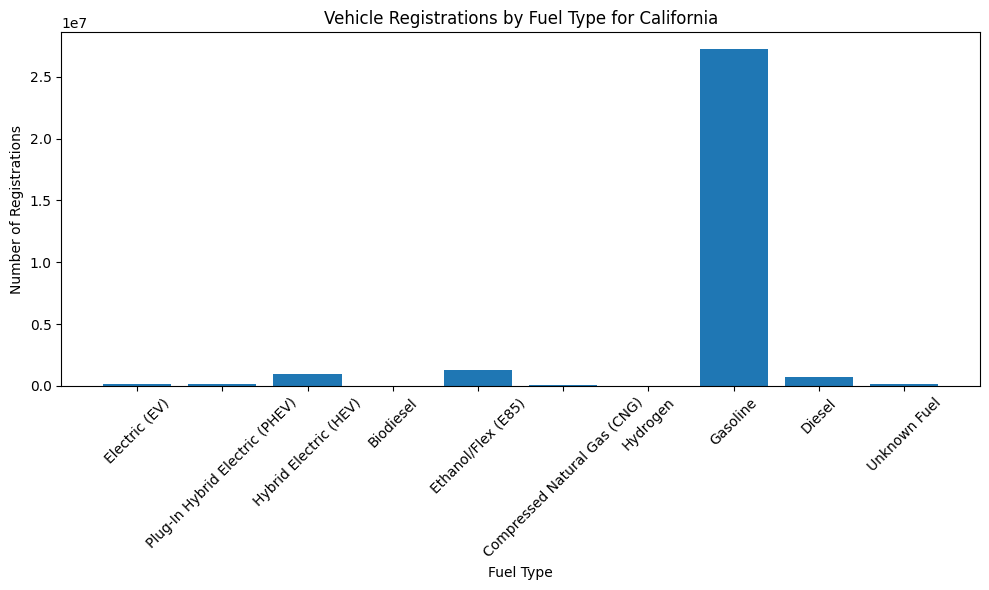

Registrations                       Fuel Type
0         141500                   Electric (EV)
1         116700  Plug-In Hybrid Electric (PHEV)
2         966700           Hybrid Electric (HEV)
3              0                       Biodiesel
4        1322600              Ethanol/Flex (E85)
5          80600    Compressed Natural Gas (CNG)
6           1300                        Hydrogen
7       27241000                        Gasoline
8         710400                          Diesel
9         115500                    Unknown Fuel

In [3]:
def compare_fuel_types_by_state_robust_v2(data, state):
    """
    Compares the number of car registrations under different fuel types for a specific state,
    with robust handling of data types and formatting issues including NaN values.
    
    Args:
    data (DataFrame): The dataset containing car registration information.
    state (str): The state for which to perform the comparison.
    
    Returns:
    DataFrame: A DataFrame with fuel types and their corresponding registration counts for the specified state.
    """
    # Filter the data for the specific state
    state_data = data[data['State'].str.strip().str.lower() == state.lower()]
    
    if state_data.empty:
        return f"No data available for {state}. Please check the state name and try again."

    # Remove 'State' column and transpose for easier plotting
    state_data = state_data.drop('State', axis=1).transpose()
    state_data.columns = ['Registrations']

    # Clean the data by removing commas, replacing NaNs with 0, and converting to integers
    state_data['Registrations'] = state_data['Registrations'].str.replace(',', '').fillna(0).astype(int)

    state_data['Fuel Type'] = state_data.index
    state_data = state_data.reset_index(drop=True)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(state_data['Fuel Type'], state_data['Registrations'])
    plt.xlabel('Fuel Type')
    plt.ylabel('Number of Registrations')
    plt.title(f'Vehicle Registrations by Fuel Type for {state.title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return state_data

# Test the function with a specific state to ensure the conversion issue is resolved
compare_fuel_types_by_state_robust_v2(df_2016, 'California')



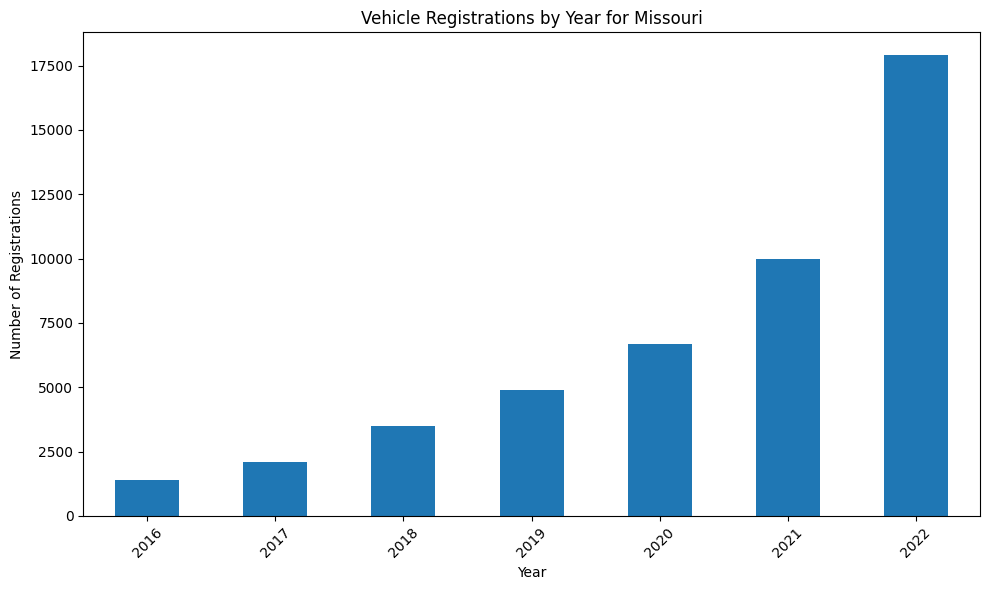

Year
2016     1400
2017     2100
2018     3500
2019     4900
2020     6700
2021    10000
2022    17900
Name: Missouri, dtype: int64

In [4]:
import matplotlib.pyplot as plt

def compare_fuel_types_by_state_robust(data_pivot, state):
    """
    Compares the number of car registrations under different fuel types for a specific state,
    using a preprocessed DataFrame where each column is a year and each row is a state.

    Args:
    data_pivot (DataFrame): The DataFrame containing car registration information indexed by state with fuel types as columns.
    state (str): The state for which to perform the comparison.

    Returns:
    DataFrame: A DataFrame with fuel types and their corresponding registration counts for the specified state.
    """
    # Check if the state is in the DataFrame
    if state.title() not in data_pivot.index:
        return f"No data available for {state}. Please check the state name and try again."

    # Select the data for the specified state
    state_data = data_pivot.loc[state.title()]

    # Plotting
    plt.figure(figsize=(10, 6))
    state_data.plot(kind='bar')
    plt.xlabel('Year')
    plt.ylabel('Number of Registrations')
    plt.title(f'Vehicle Registrations by Year for {state.title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return state_data

# Example usage
# Assuming 'data_pivot' is the DataFrame with each column as a year and rows as states.
compare_fuel_types_by_state_robust(result, 'Missouri')


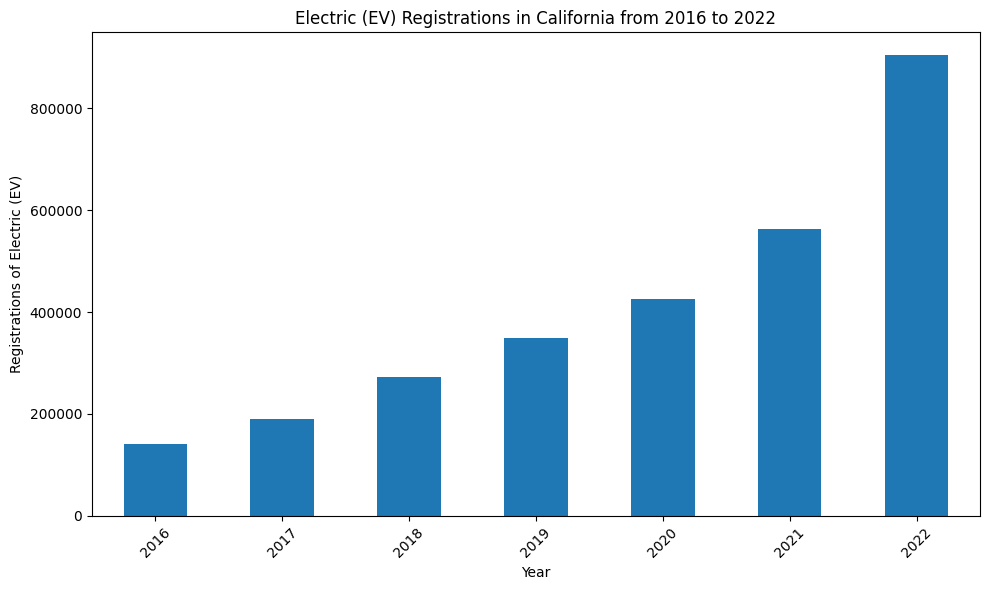

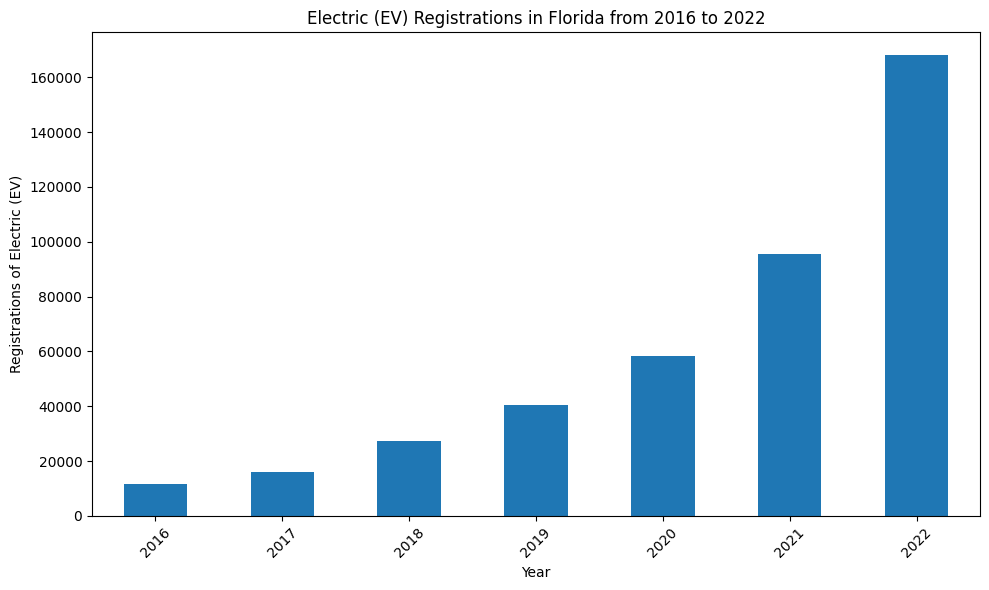

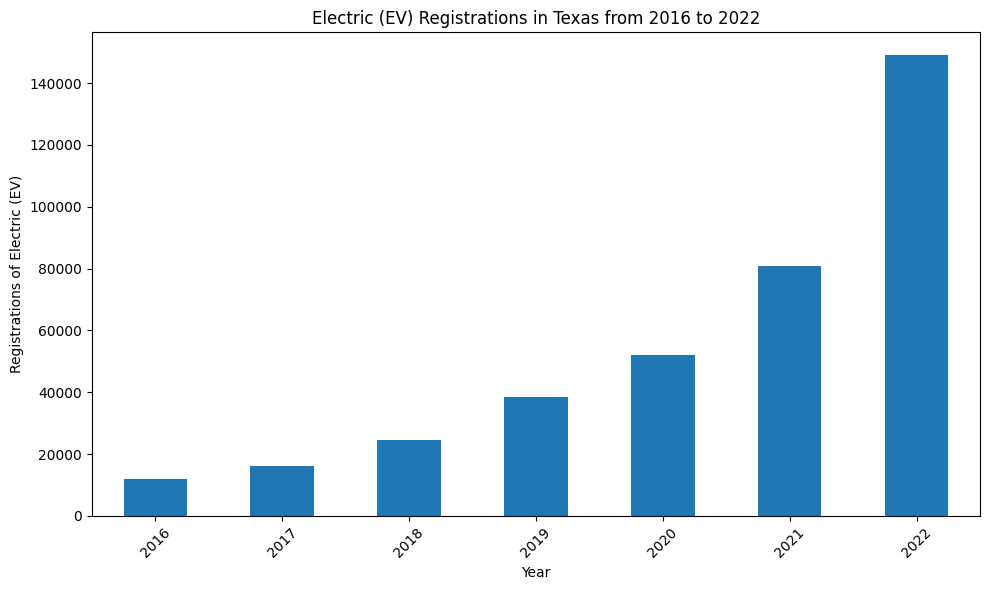

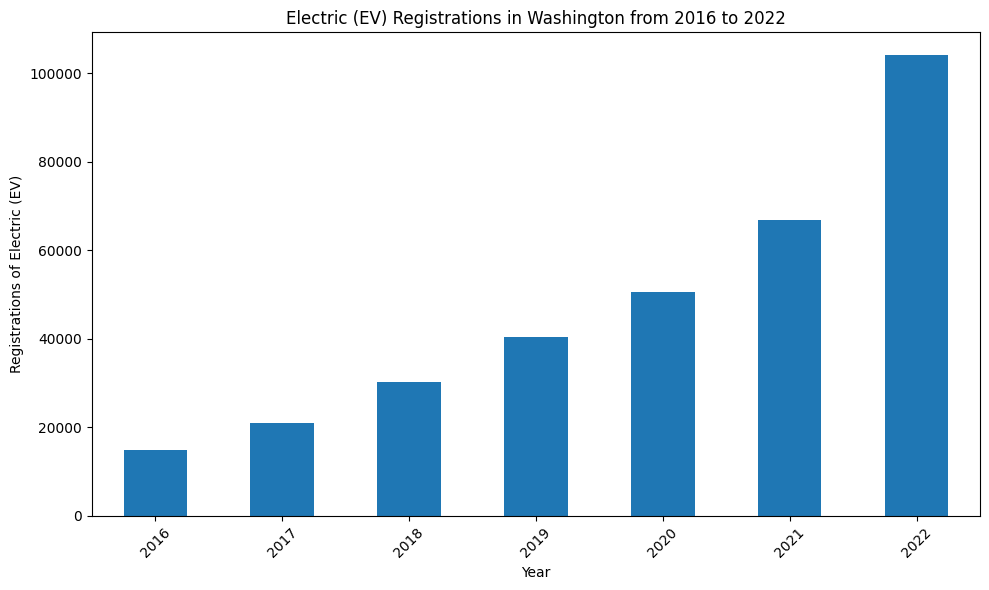

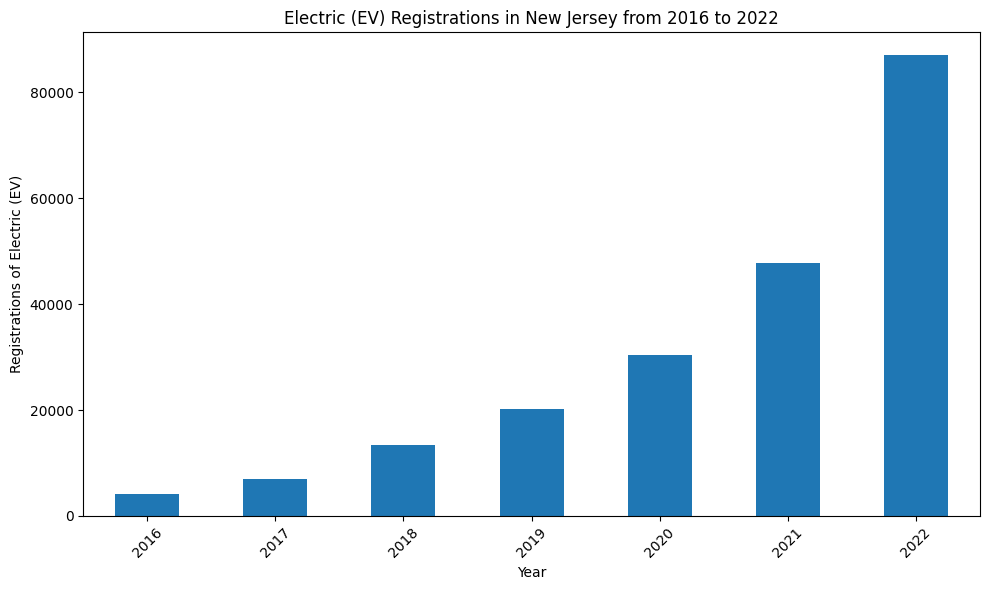

In [5]:
import matplotlib.pyplot as plt

def visualize_data_by_state(data_pivot, fuel_type, num_states):
    """
    Visualizes registration data by state from a preprocessed DataFrame.

    Args:
    data_pivot (pd.DataFrame): A DataFrame with years as columns and states as rows.
    fuel_type (str): Type of fuel to analyze. This affects the title of the plots.
    num_states (int): Number of states to display in the visualizations.

    Returns:
    None: Directly plots the figures for each state.
    """
    # Ensure the input for number of states does not exceed the number of states in the DataFrame
    num_states = min(num_states, len(data_pivot))

    # Sort states by the latest year's registrations to find the top 'num_states' states
    sorted_states = data_pivot.sort_values(by=data_pivot.columns[-1], ascending=False).head(num_states).index

    # Visualize data for top states
    for state in sorted_states:
        plt.figure(figsize=(10, 6))
        data_pivot.loc[state].plot(kind='bar')
        plt.title(f'{fuel_type} Registrations in {state} from {data_pivot.columns[0]} to {data_pivot.columns[-1]}')
        plt.xlabel('Year')
        plt.ylabel(f'Registrations of {fuel_type}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage (assuming 'data_pivot' and 'fuel_type' are already defined in your notebook)
visualize_data_by_state(result, 'Electric (EV)', 5)


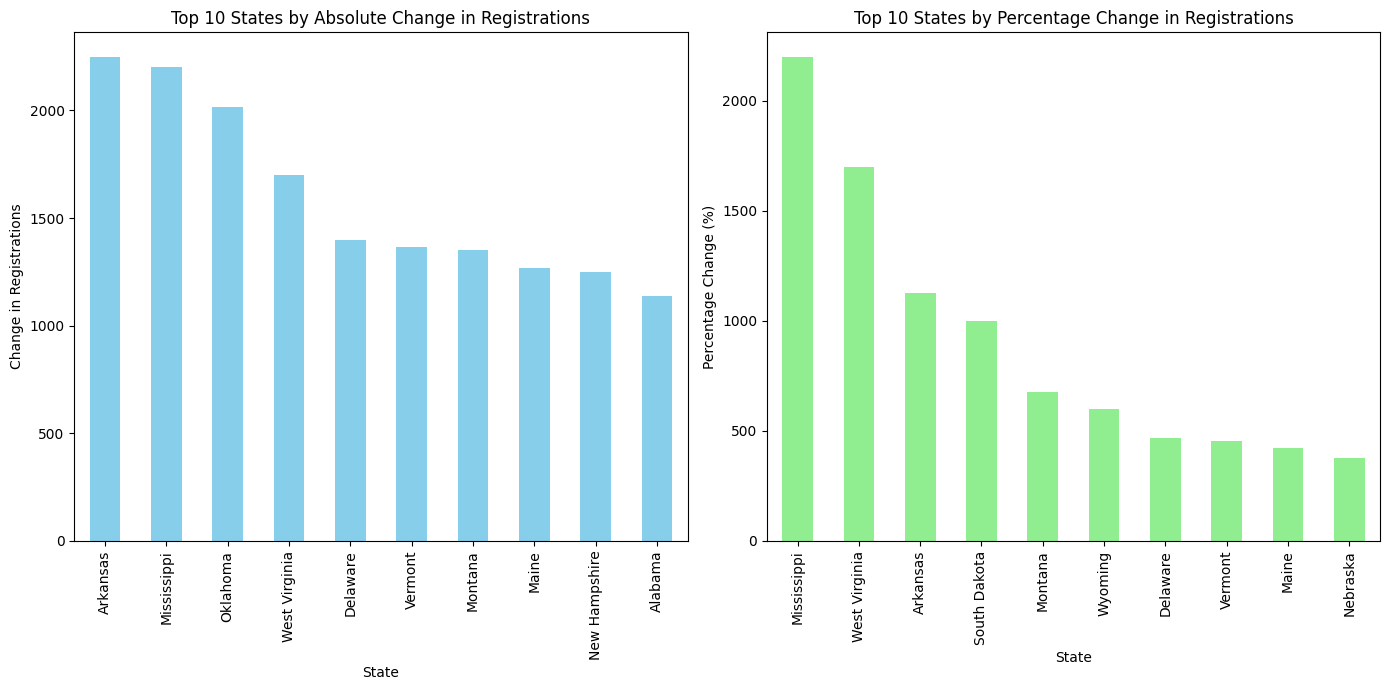

Year                    2016    2017    2018    2019    2020    2021    2022  \
State                                                                          
Alabama                  500     800    1300    2000    2900    4700    8700   
Alaska                   200     400     500     700     900    1300    2000   
Arizona                 4700    7200   12600   19500   28800   40700   65800   
Arkansas                 200     300     600     900    1300    2400    5100   
California            141500  189700  273500  349700  425300  563100  903600   
Colorado                5300    8000   12500   19200   24700   37000   59900   
Connecticut             2000    3000    5000    6900    9000   13300   22000   
Delaware                 300     400     800    1300    1900    3000    5400   
District of Columbia     600     800    1100    1800    2400    3700    5900   
Florida                11600   15900   27400   40300   58200   95600  168000   
Georgia                18000   14400   1

In [9]:
import matplotlib.pyplot as plt

def visualize_changes(data_pivot):
    """
    Plots changes in vehicle registrations from the first to the last year available in the DataFrame.

    Args:
    data_pivot (pd.DataFrame): DataFrame with years as columns and states as rows.

    Returns:
    None: Plots figures directly.
    """
    final_year = data_pivot.columns[-1]
    initial_year = data_pivot.columns[0]
    data_pivot['Change in Registrations'] = data_pivot[final_year] - data_pivot[initial_year]
    data_pivot['% Change'] = (data_pivot['Change in Registrations'] / data_pivot[initial_year] * 100).replace(float('inf'), 0).fillna(0)

    top_changes = data_pivot.nlargest(10, 'Change in Registrations')
    top_pct_changes = data_pivot.nlargest(10, '% Change')

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    top_changes['Change in Registrations'].plot(kind='bar', color='skyblue')
    plt.title('Top 10 States by Absolute Change in Registrations')
    plt.xlabel('State')
    plt.ylabel('Change in Registrations')

    plt.subplot(1, 2, 2)
    top_pct_changes['% Change'].plot(kind='bar', color='lightgreen')
    plt.title('Top 10 States by Percentage Change in Registrations')
    plt.xlabel('State')
    plt.ylabel('Percentage Change (%)')
    plt.tight_layout()
    plt.show()

# Example usage to visualize data (Assuming 'data_pivot' is already loaded and processed):
visualize_changes(result)
print(result)

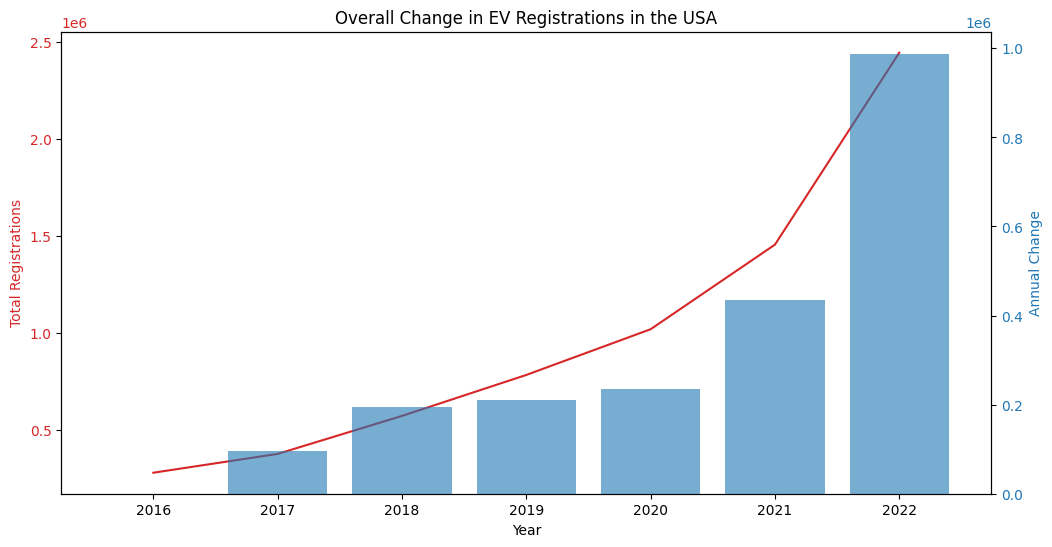

      Total Registrations  Annual Change  Percentage Change
Year                                                       
2016               280300            0.0           0.000000
2017               377100        96800.0          34.534427
2018               572600       195500.0          51.843012
2019               783600       211000.0          36.849459
2020              1018900       235300.0          30.028076
2021              1454400       435500.0          42.742173
2022              2442300       987900.0          67.924917


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_ev_change_usa(data_pivot):
    """
    Analyzes and visualizes the overall change in registrations of electric vehicles (EV) across the United States,
    showing both absolute and percentage changes year by year. Ignores the last two columns of the DataFrame.

    Args:
    data_pivot (DataFrame): A DataFrame with states as rows, years as columns, and EV registration numbers as values.

    Returns:
    DataFrame: A DataFrame summarizing the annual change and percentage change in registrations.
    """
    # Exclude the last two columns
    data_pivot = data_pivot.iloc[:, :-2]
    
    # Ensure all data are numeric for calculations
    data_pivot = data_pivot.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Sum the registrations across all states for each year to get a national total
    annual_totals = data_pivot.sum()

    # Calculate yearly changes and percentage changes
    changes = annual_totals.diff().fillna(0)  # Absolute change from previous year
    pct_changes = annual_totals.pct_change().fillna(0) * 100  # Percentage change from previous year

    # Prepare a DataFrame to return and visualize
    summary_df = pd.DataFrame({
        'Total Registrations': annual_totals,
        'Annual Change': changes,
        'Percentage Change': pct_changes
    })

    # Plotting total registrations and changes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot total registrations as a line plot
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Registrations', color='tab:red')
    ax1.plot(summary_df.index, summary_df['Total Registrations'], color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # Create a twin axis to plot changes as a bar plot
    ax2 = ax1.twinx()
    ax2.set_ylabel('Annual Change', color='tab:blue')
    ax2.bar(summary_df.index, summary_df['Annual Change'], color='tab:blue', alpha=0.6)
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.title('Overall Change in EV Registrations in the USA')
    plt.show()

    return summary_df

# Example usage
# Assuming 'data_pivot' is the DataFrame with each column as a year and rows as states.
result_df = compare_ev_change_usa(result)
print(result_df)


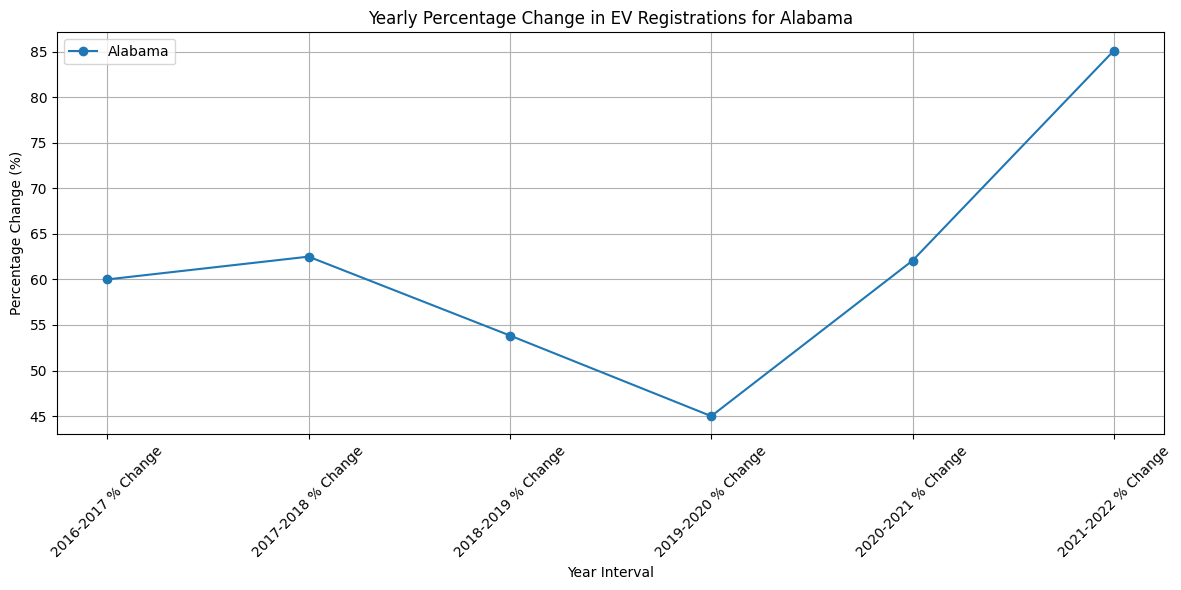

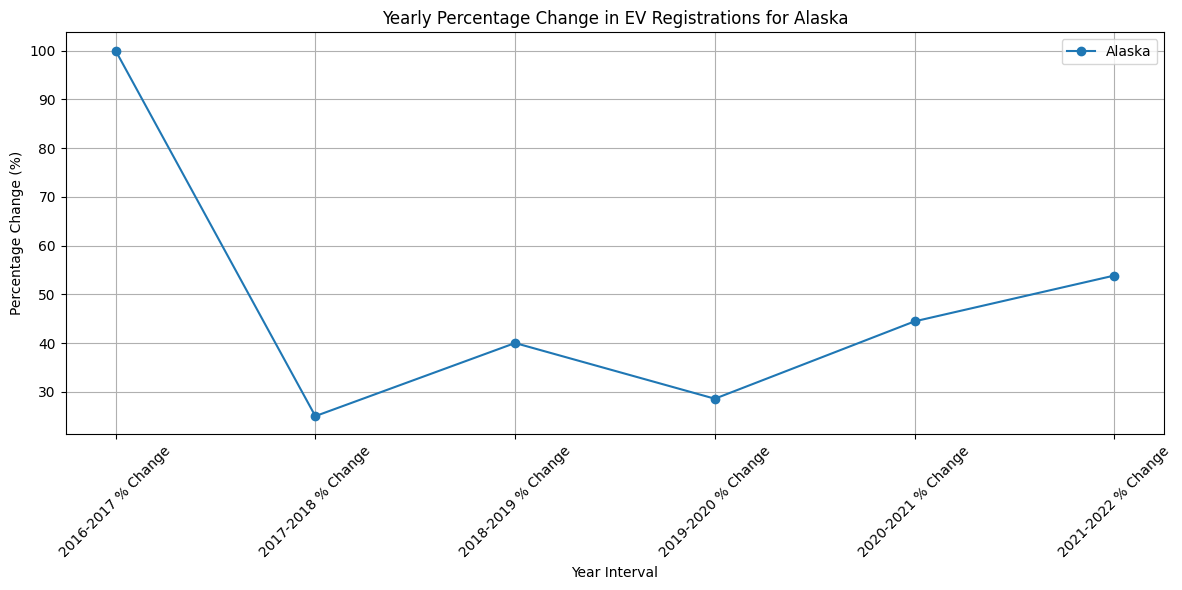

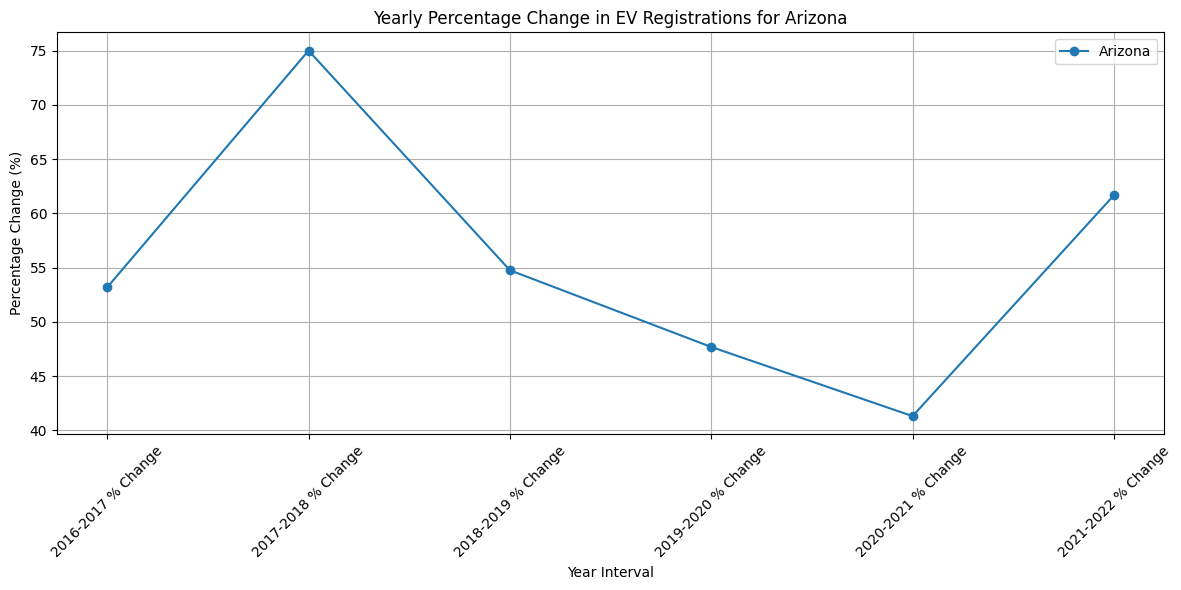

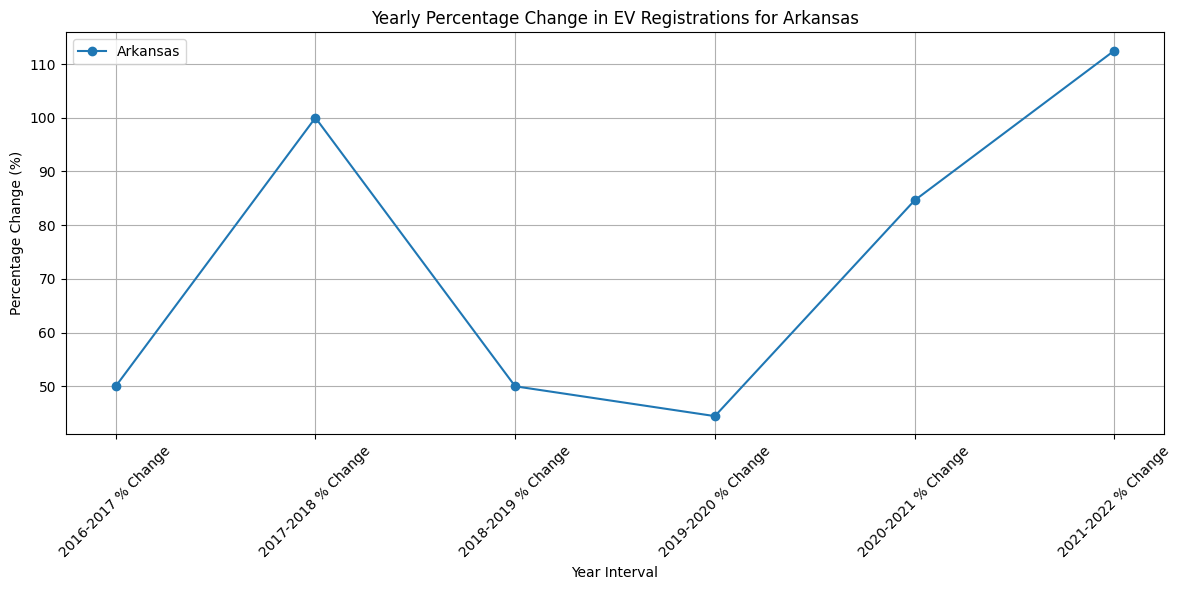

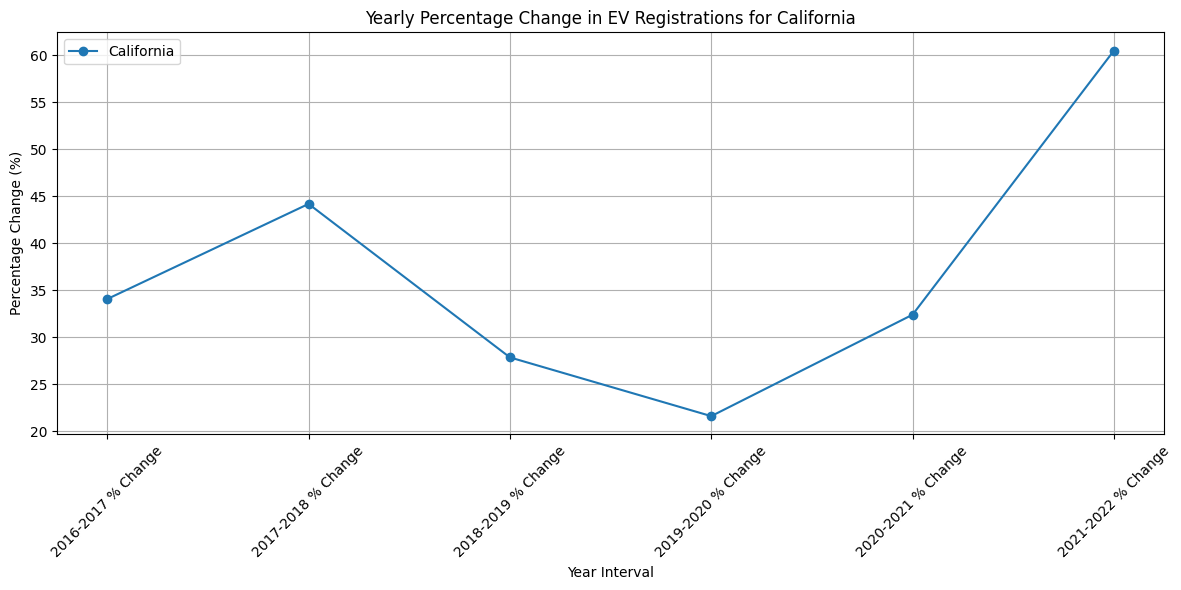

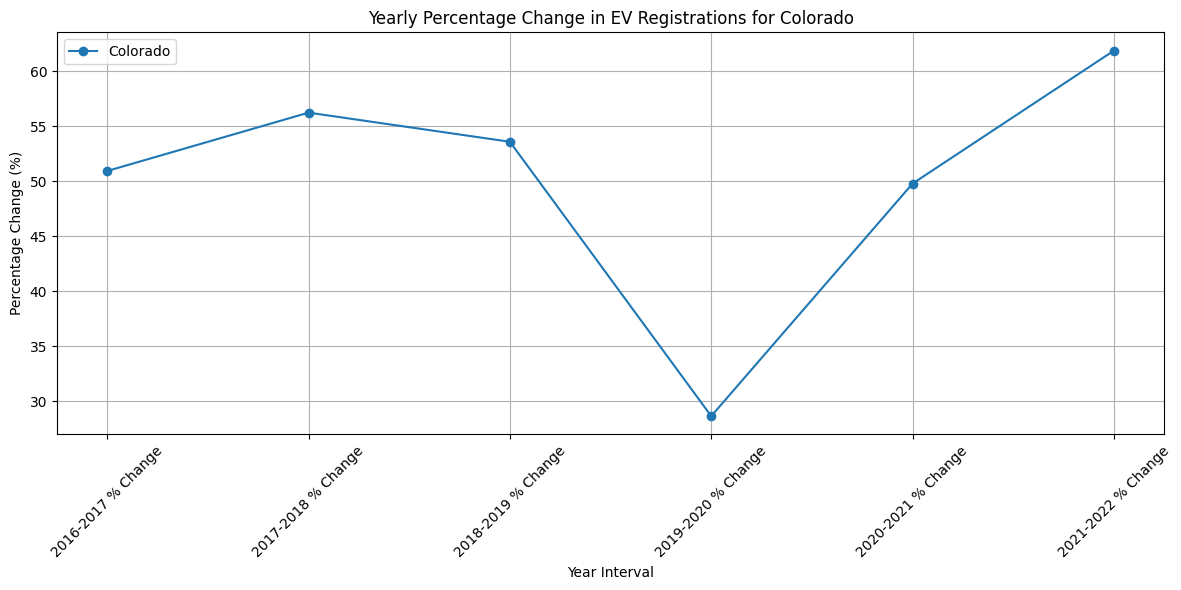

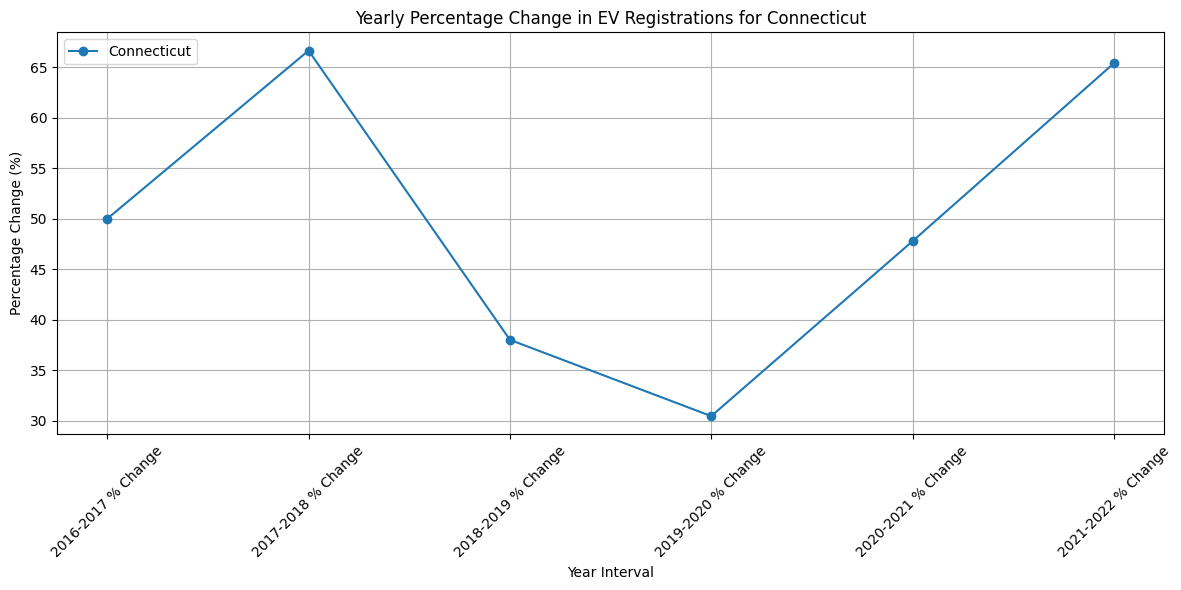

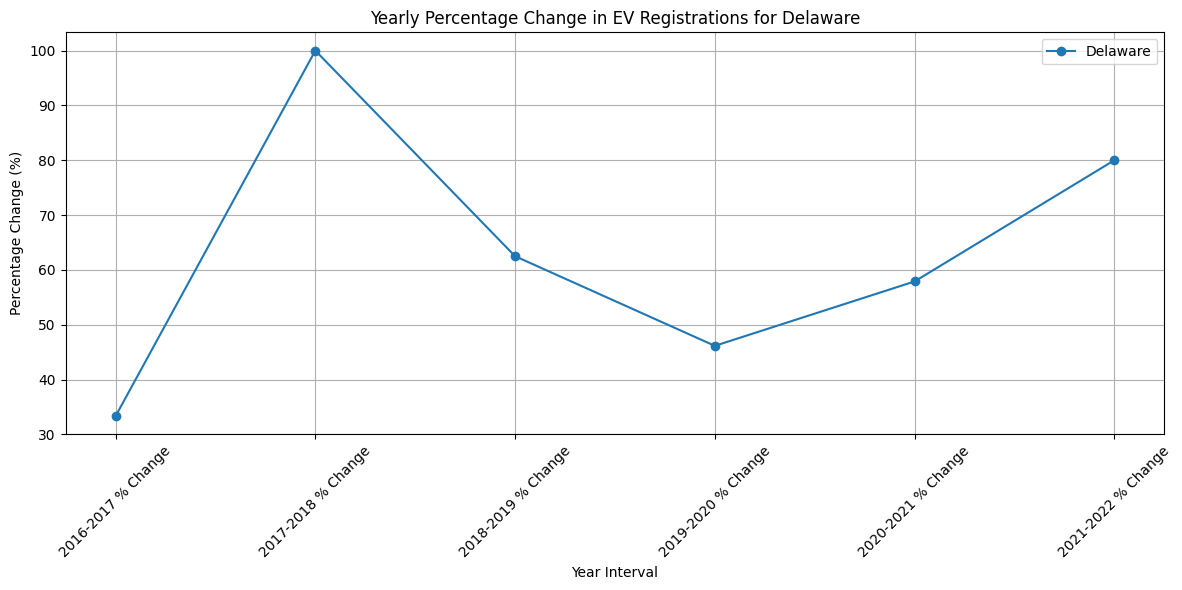

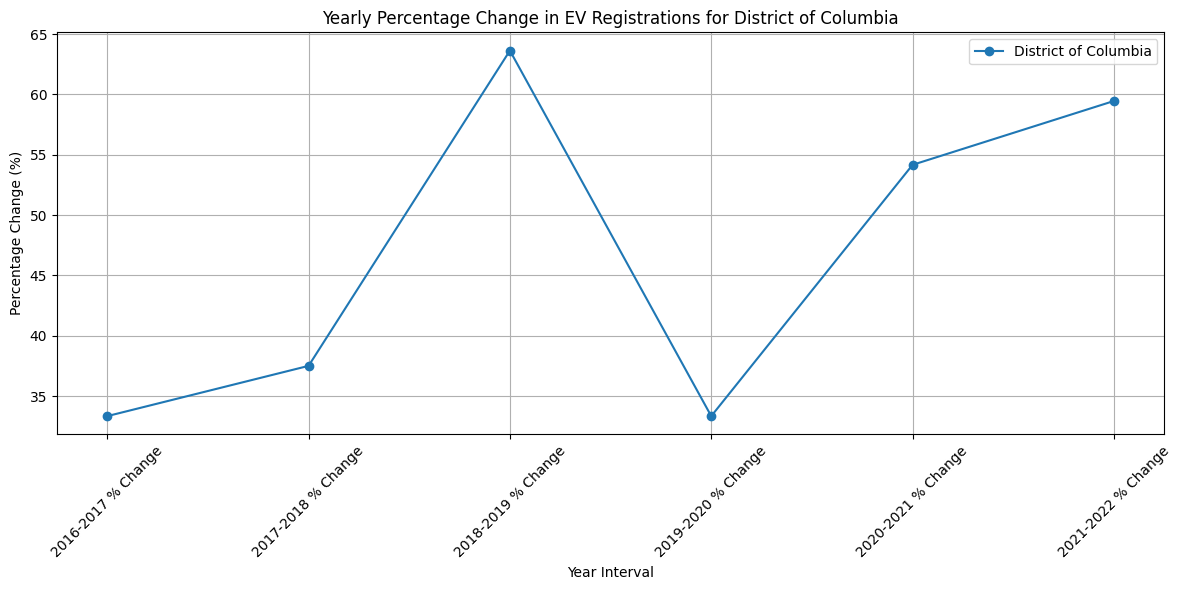

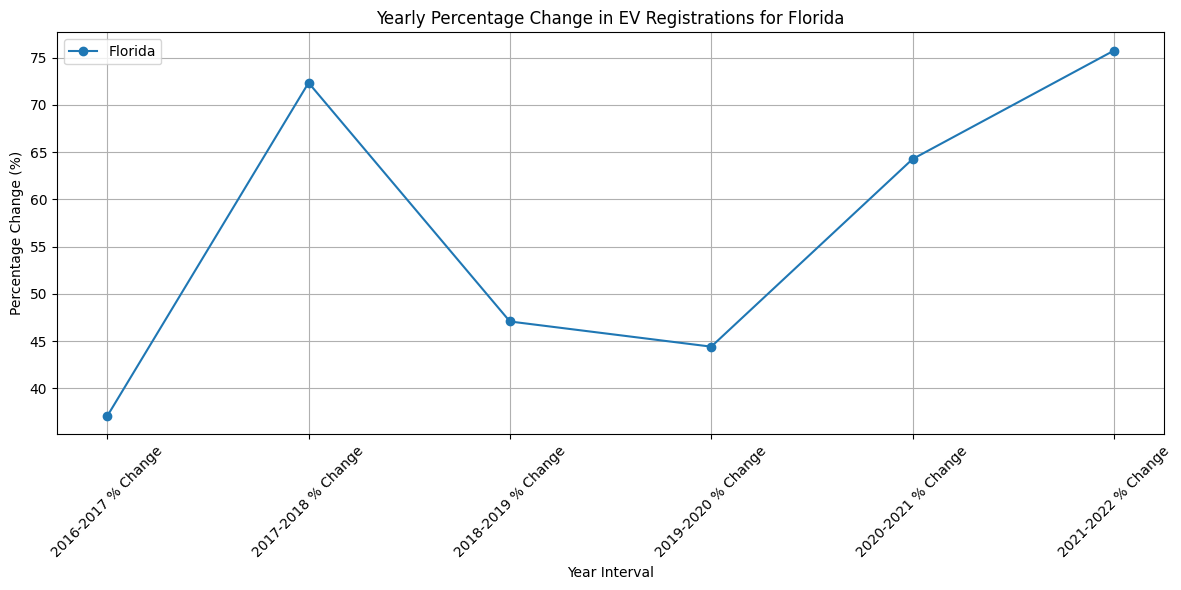

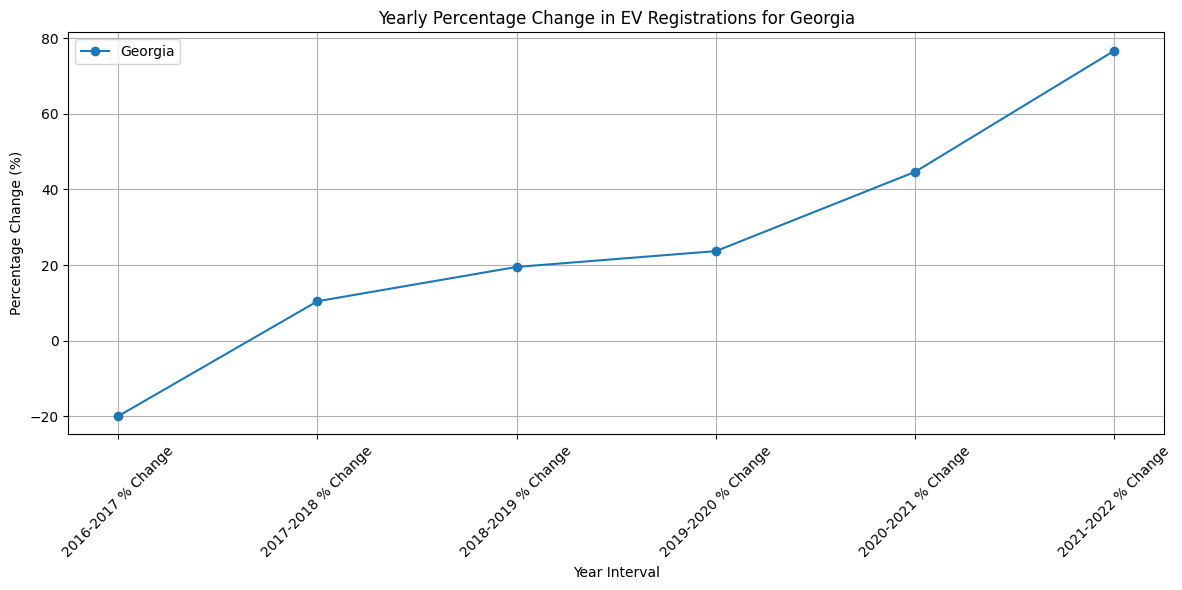

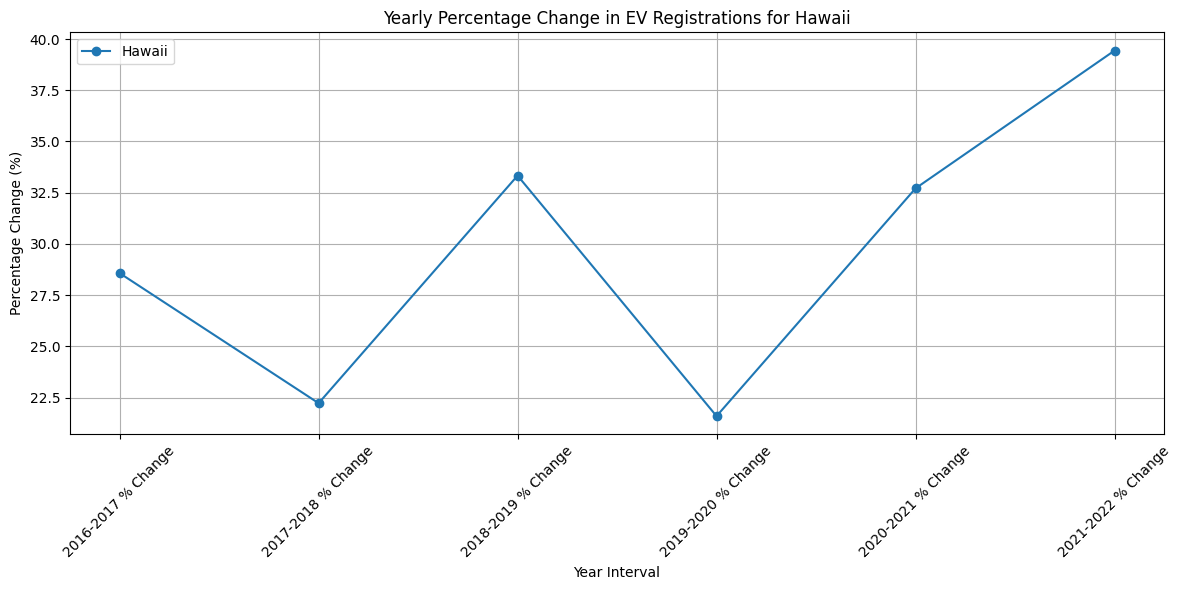

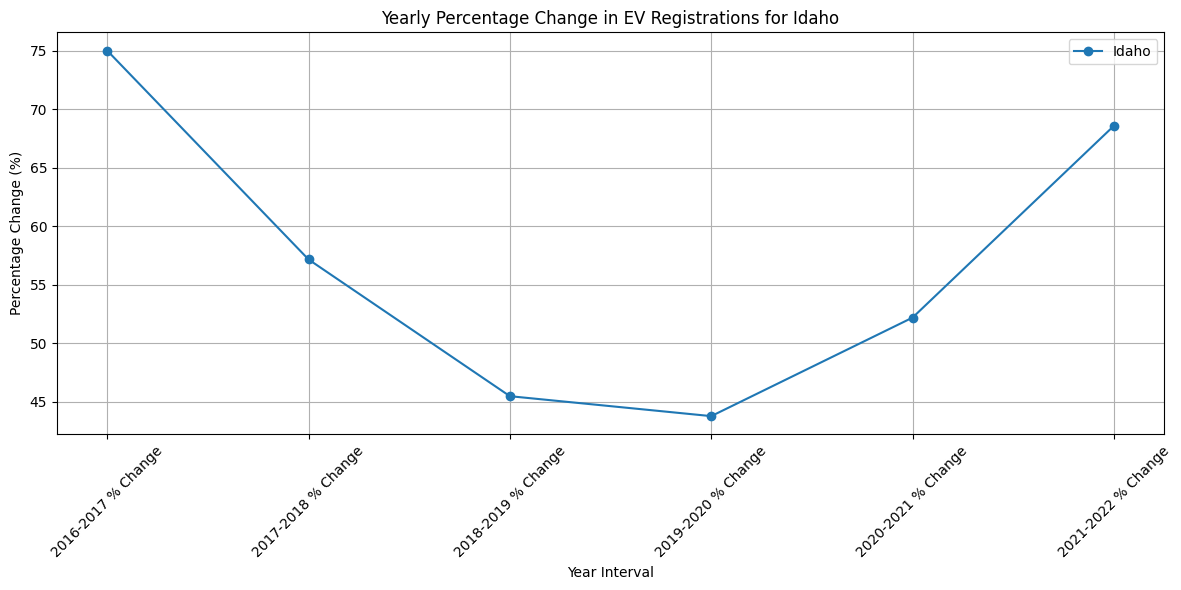

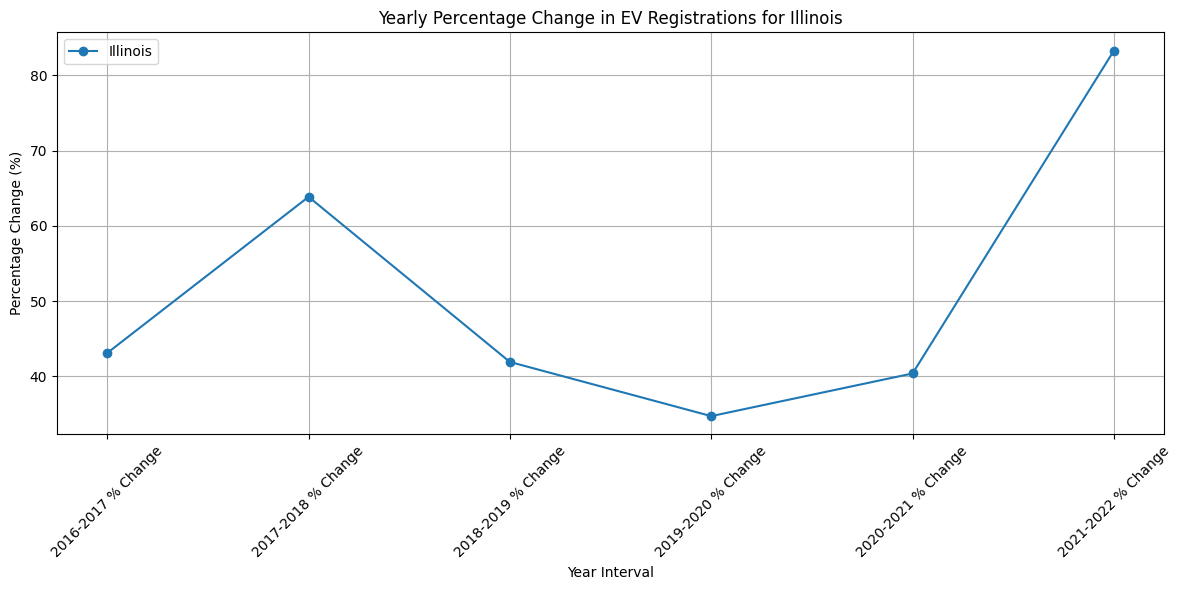

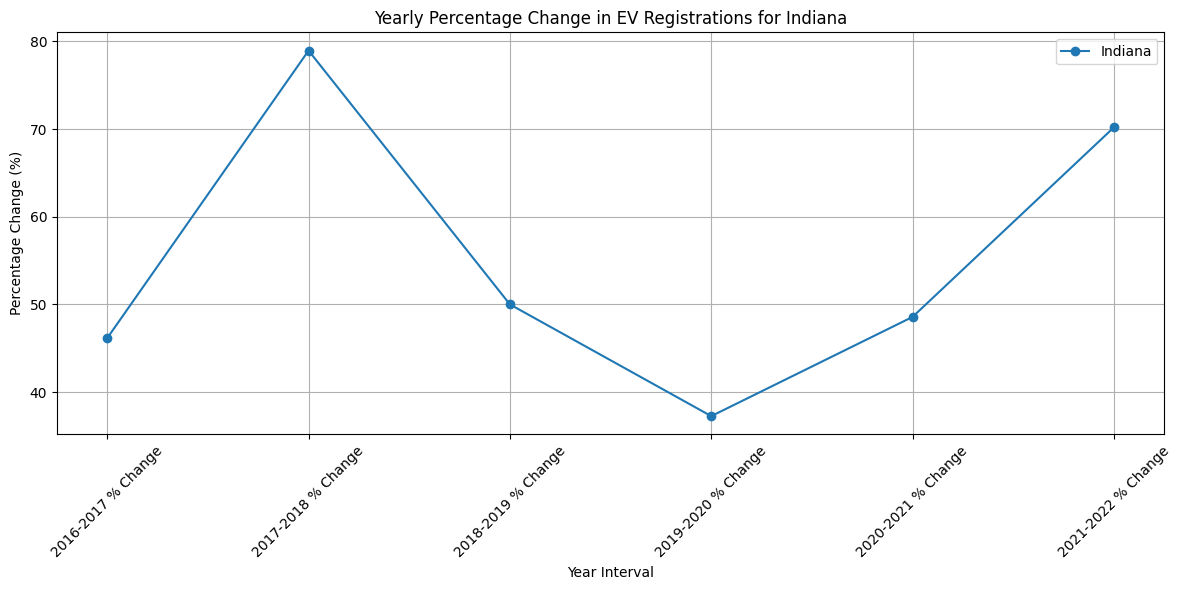

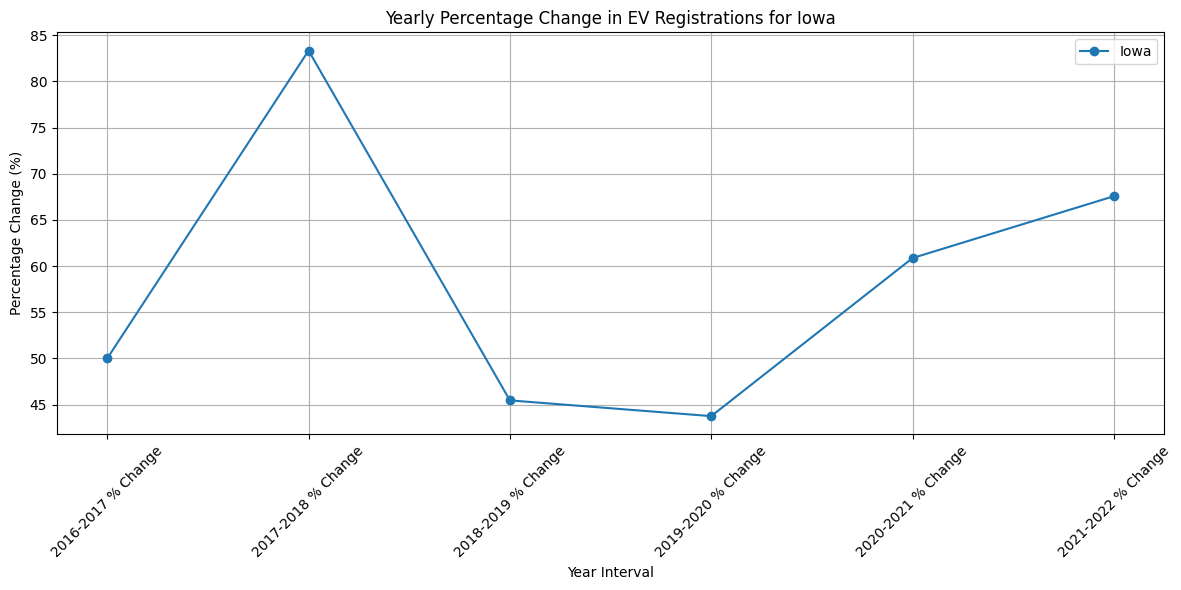

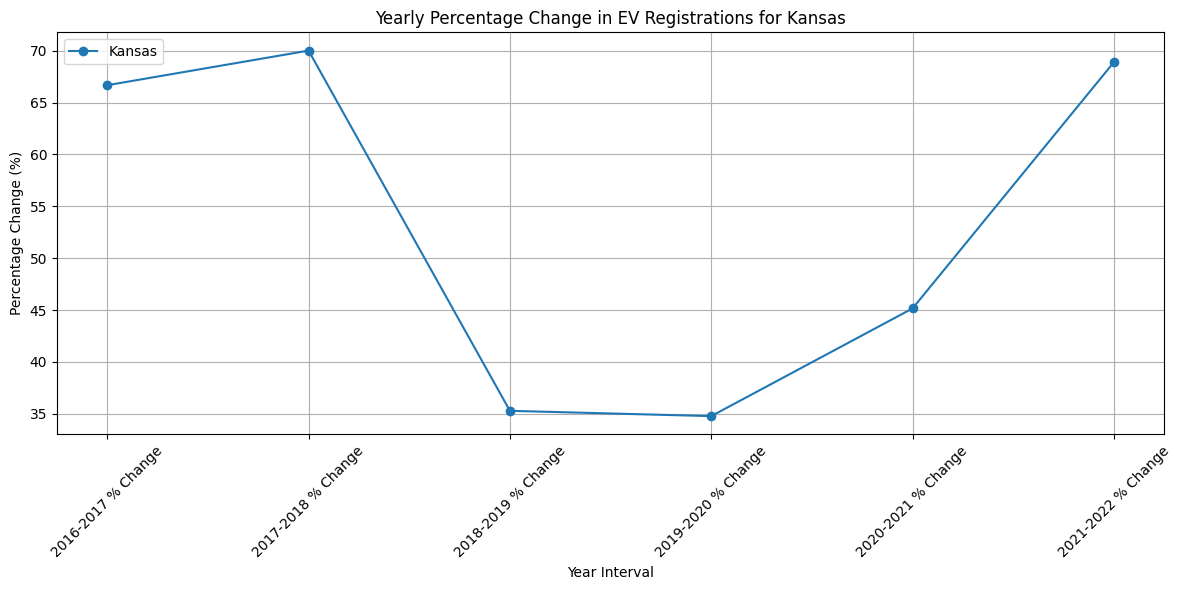

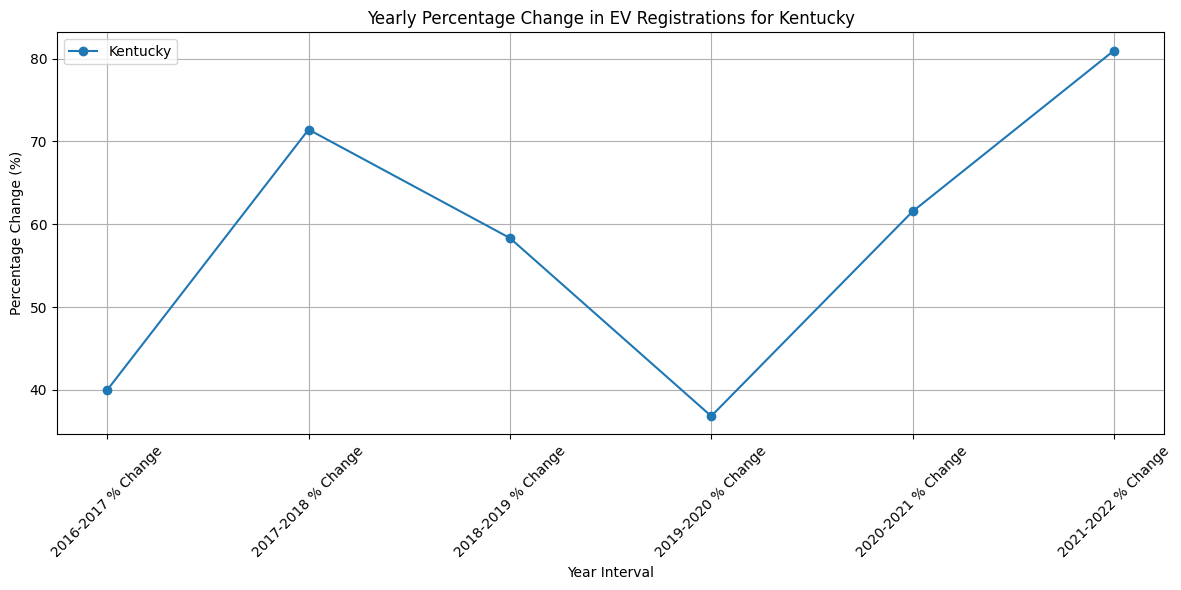

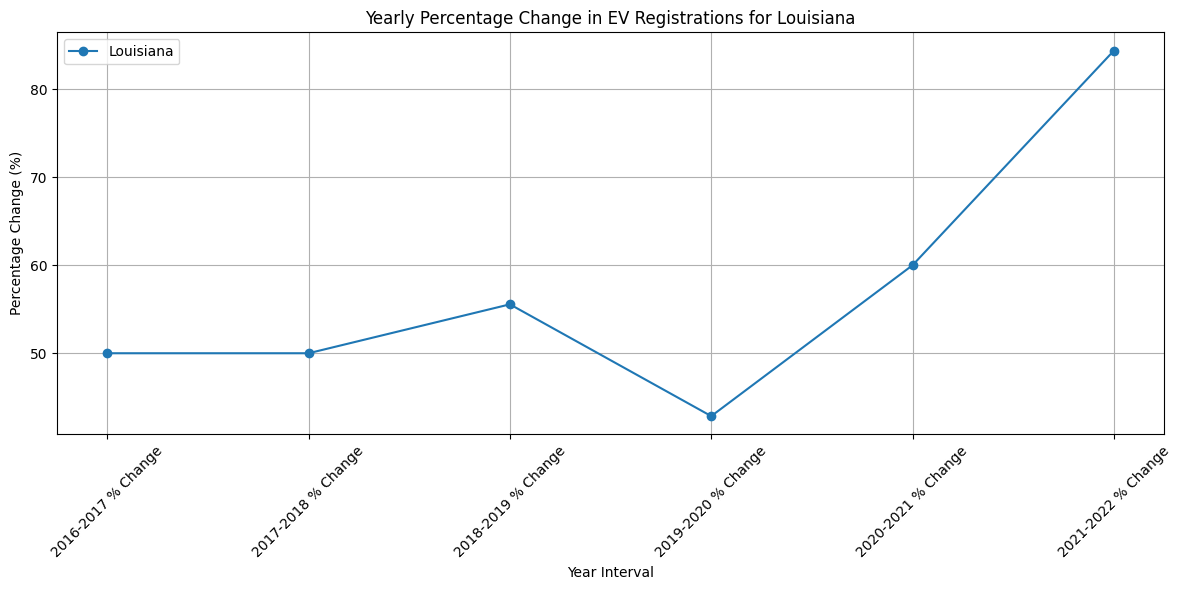

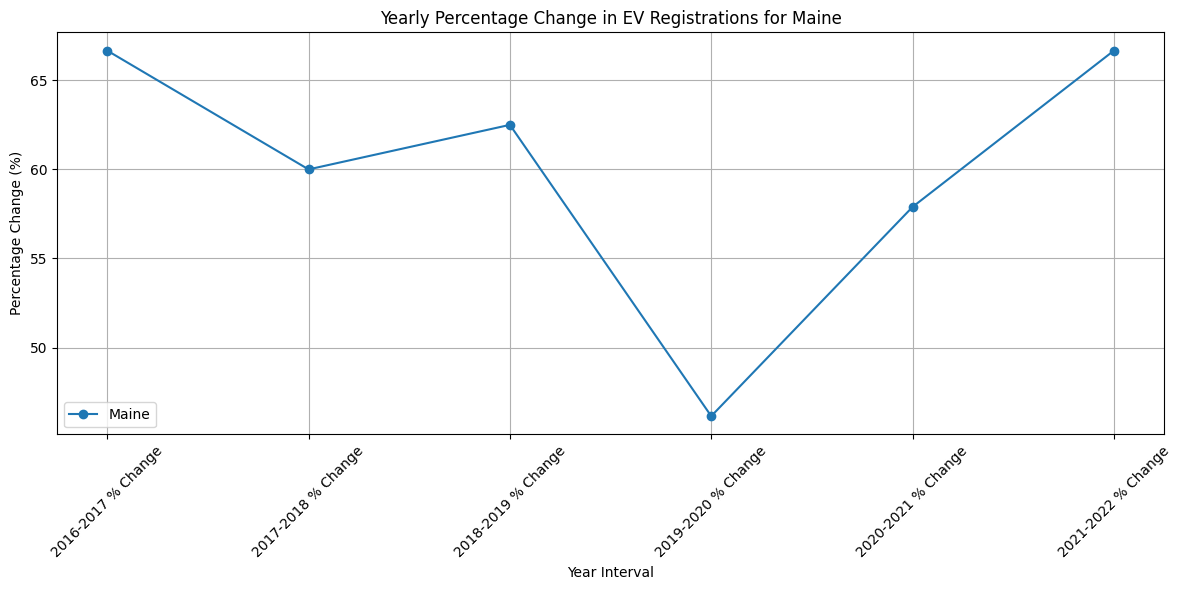

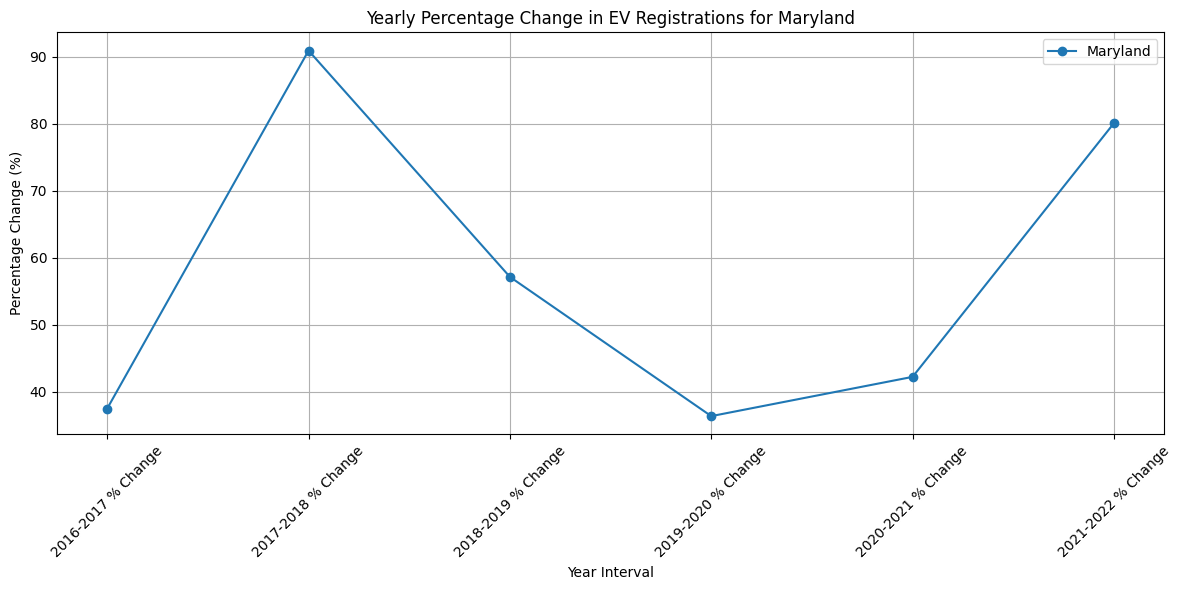

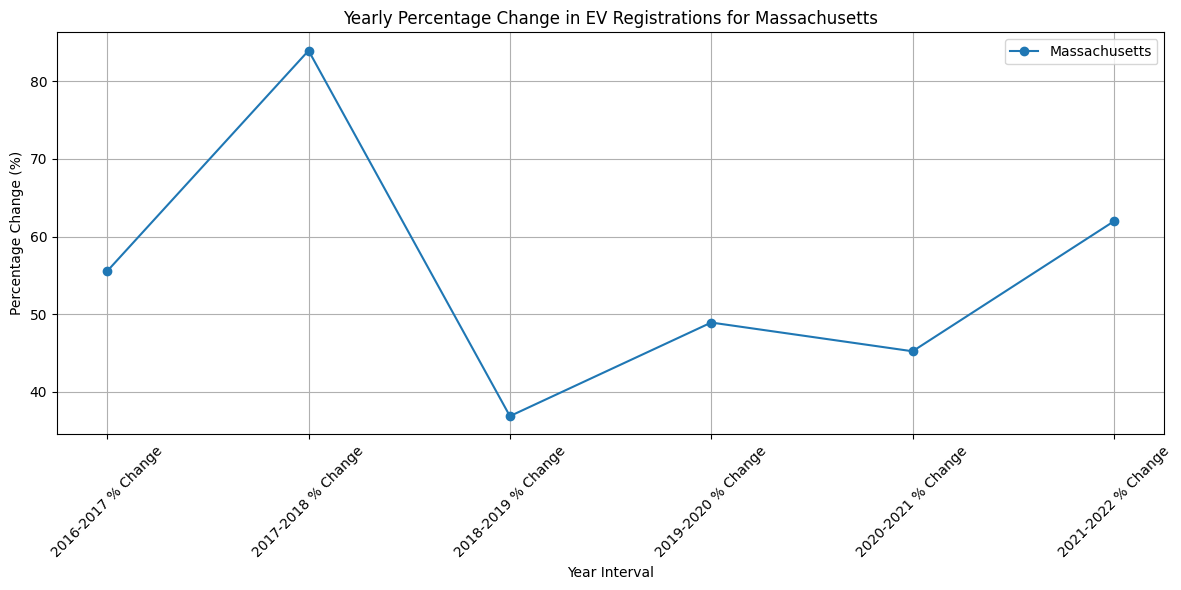

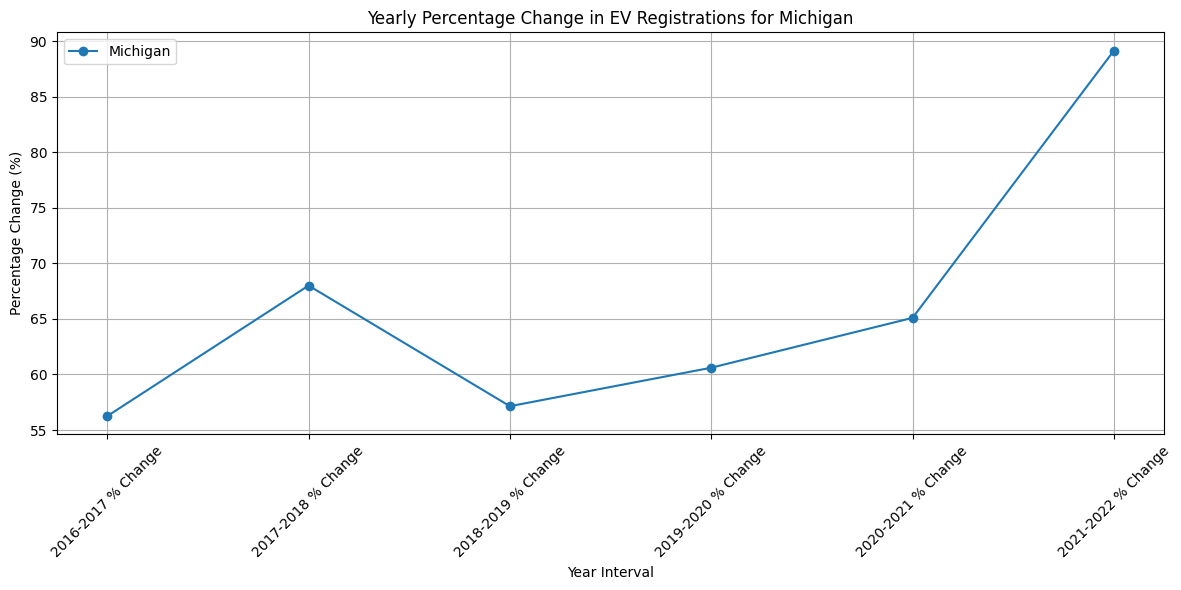

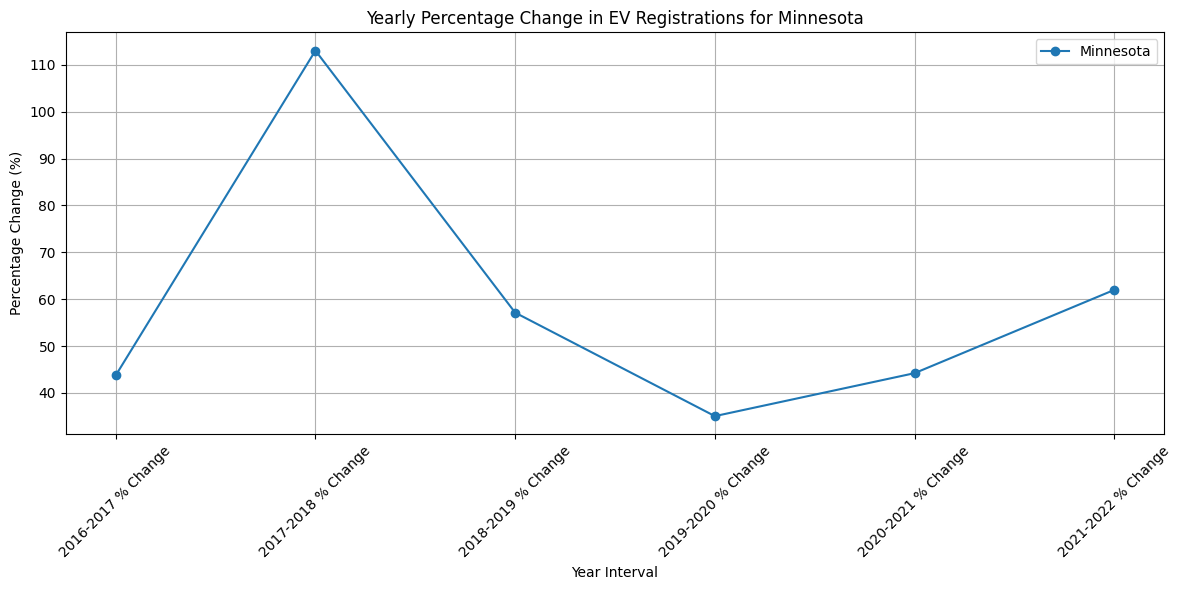

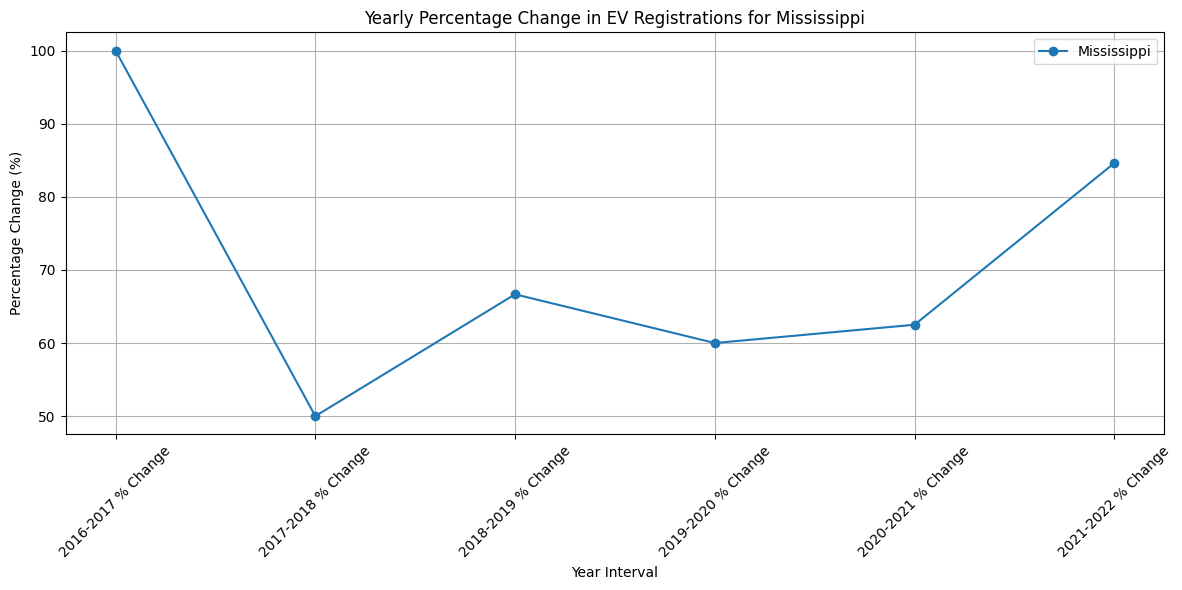

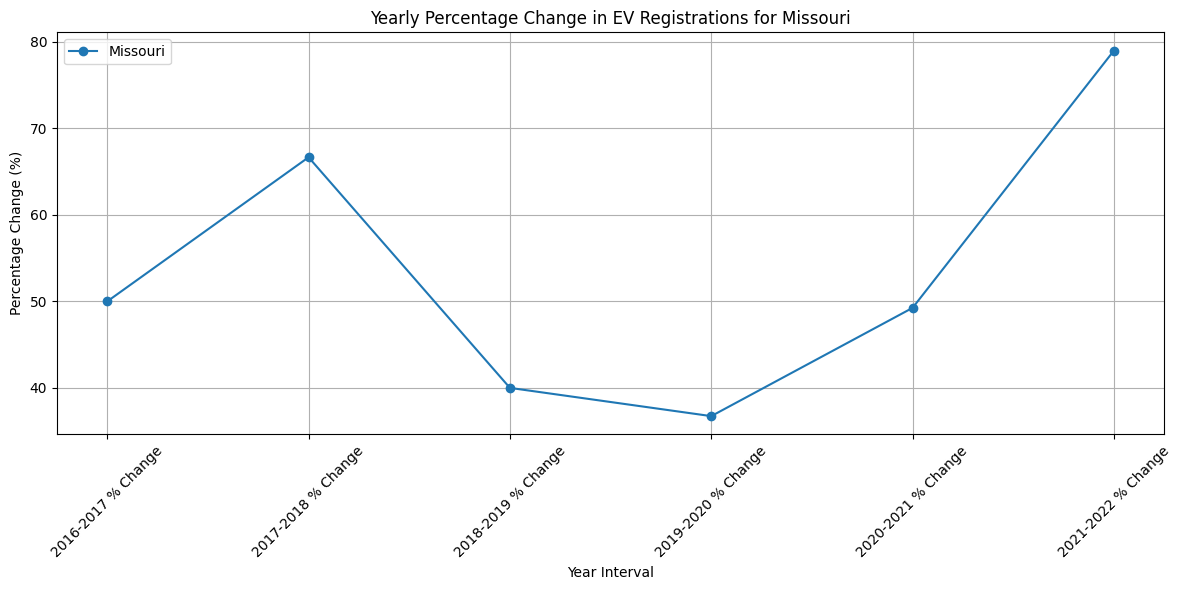

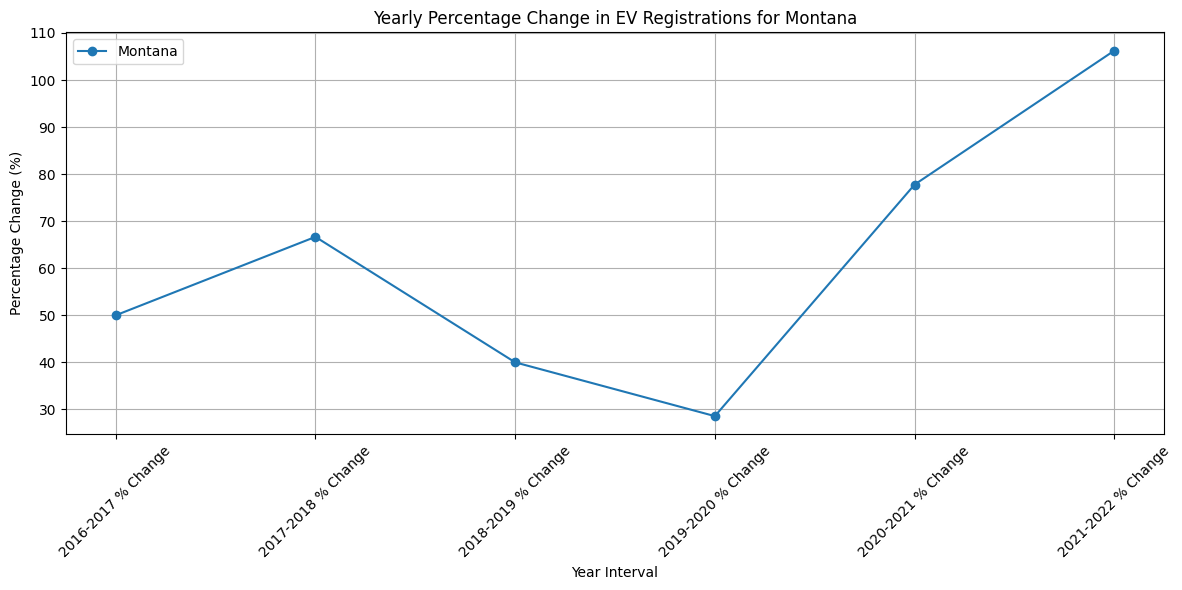

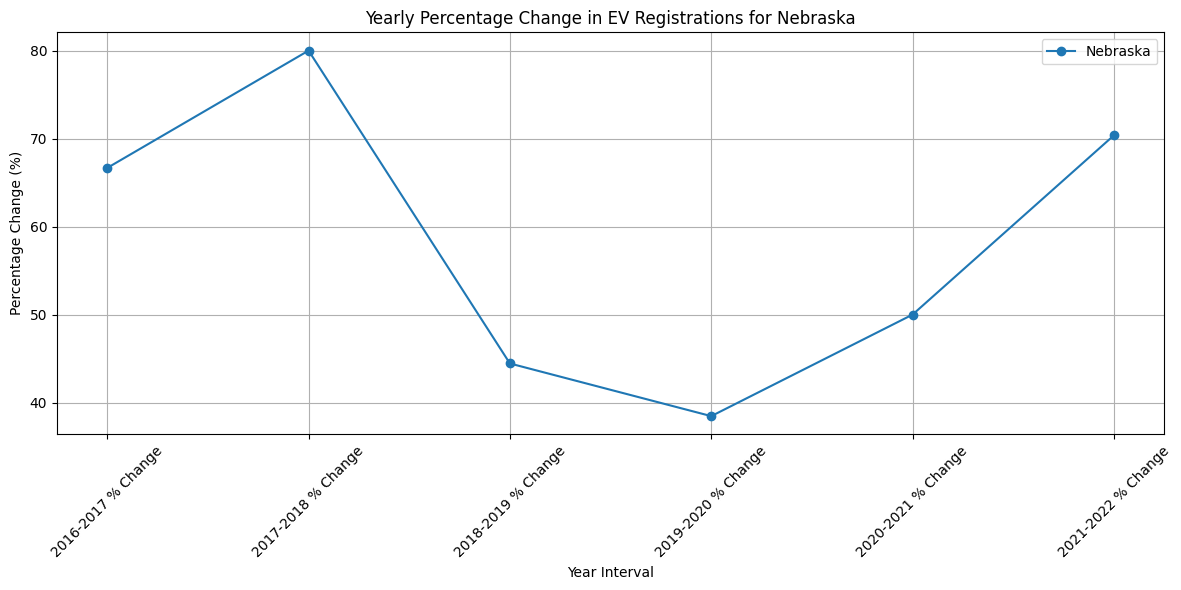

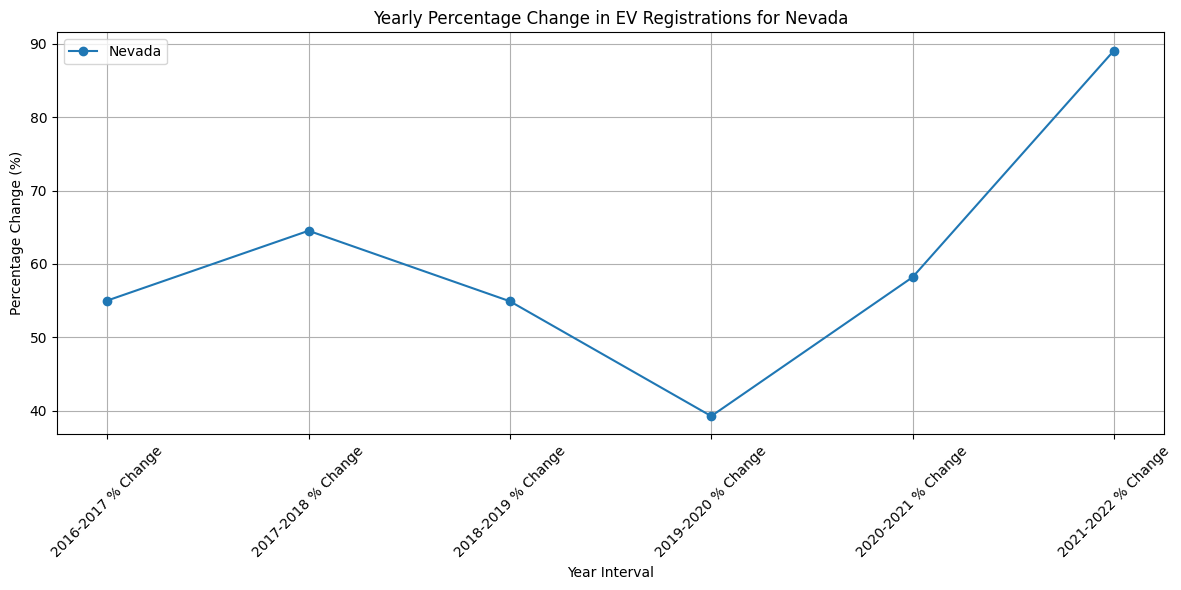

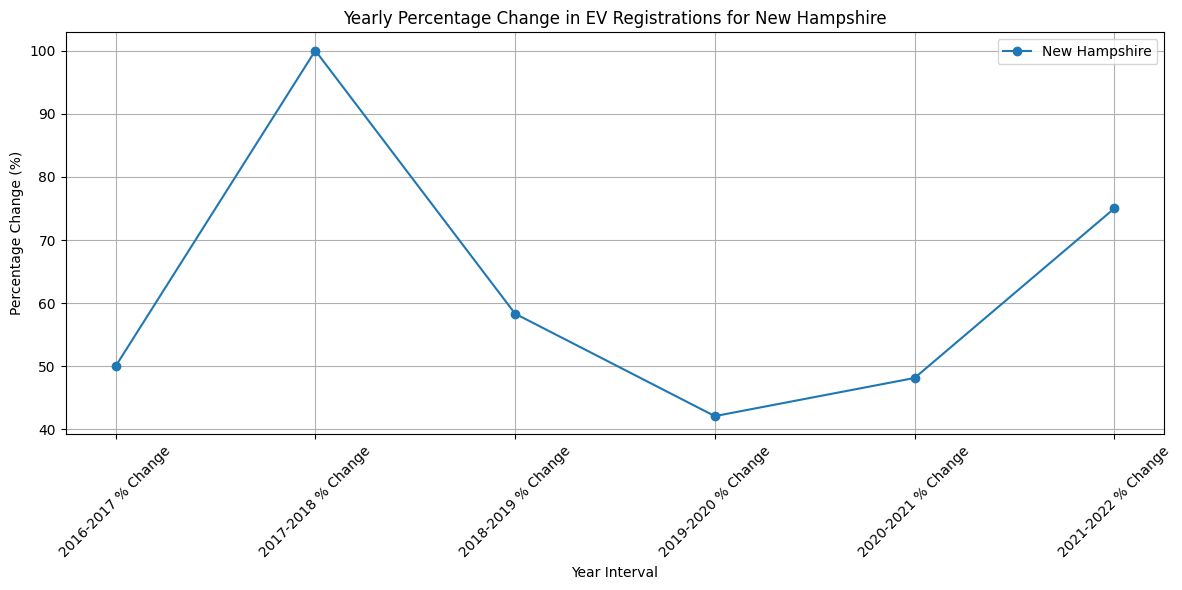

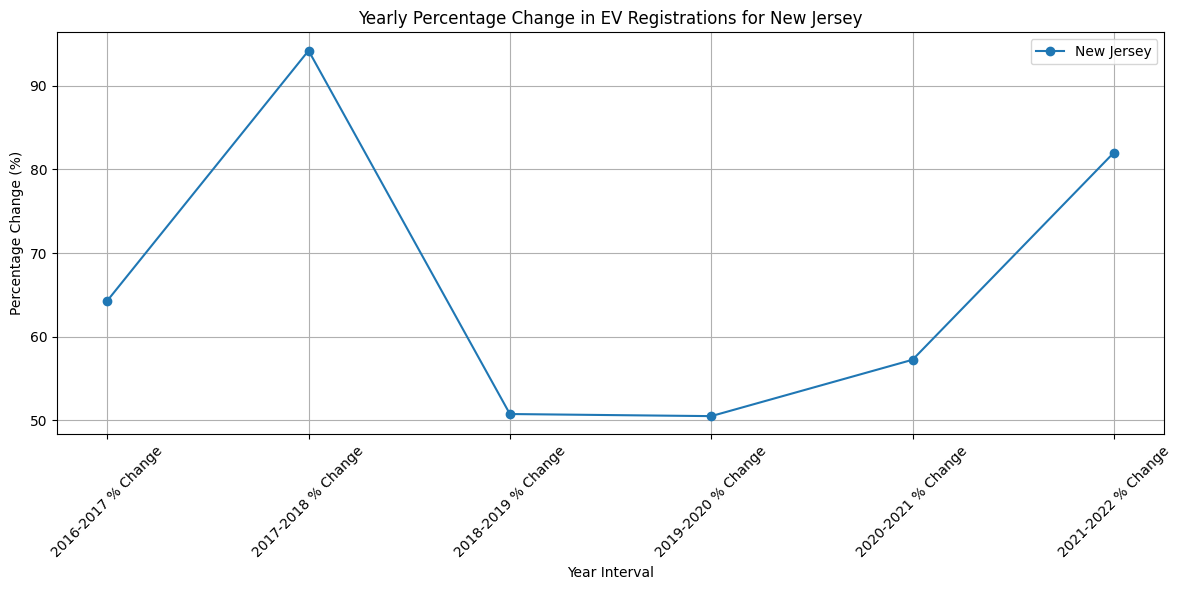

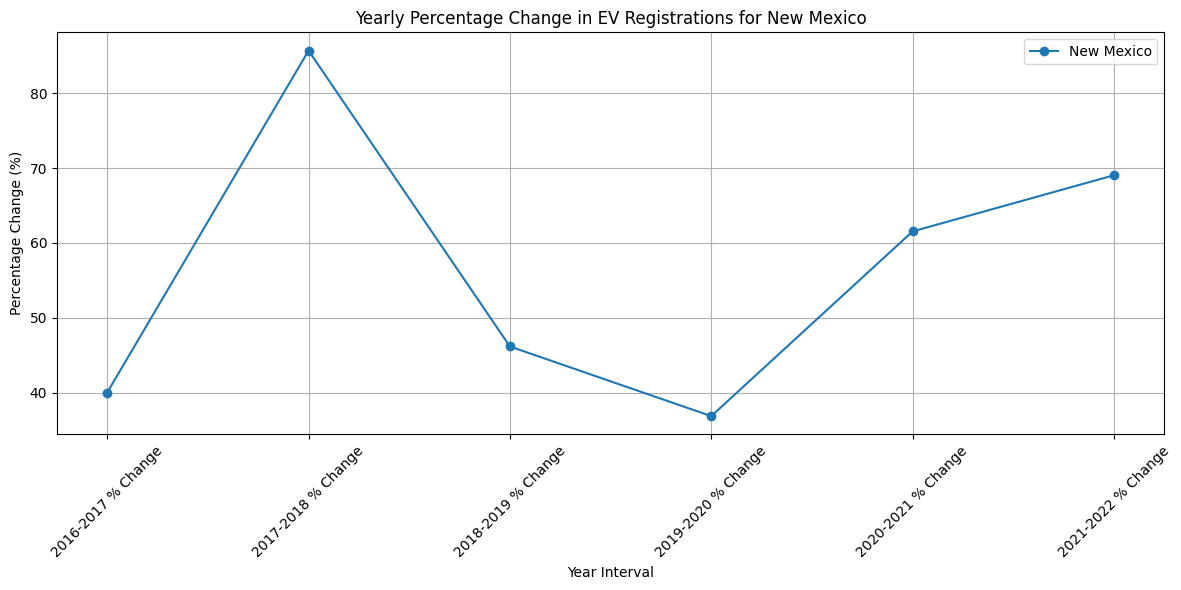

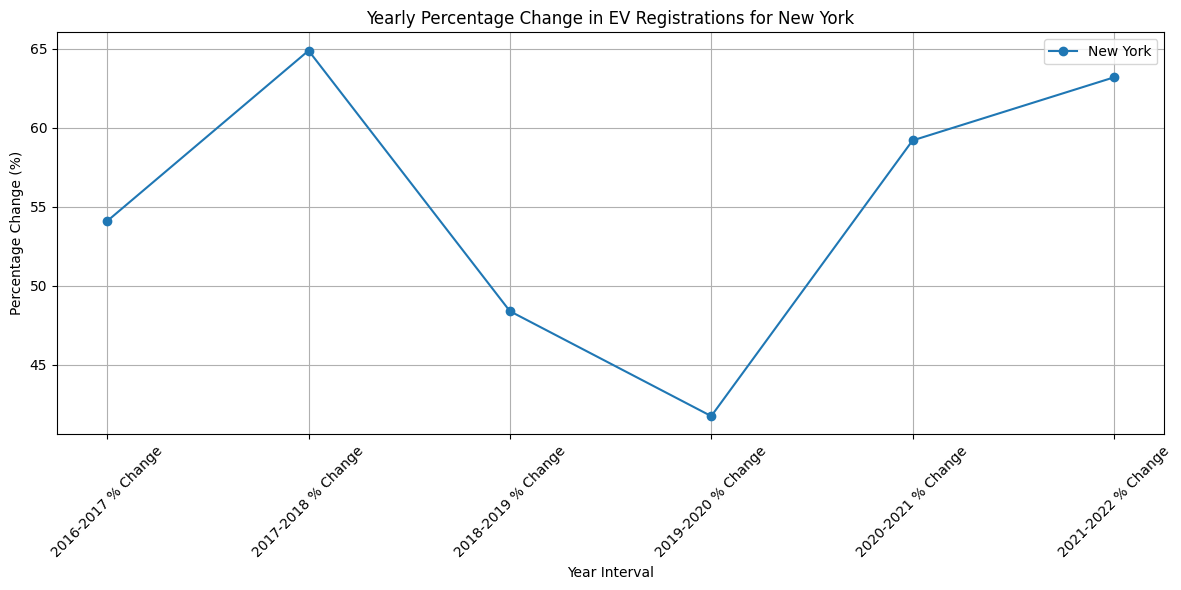

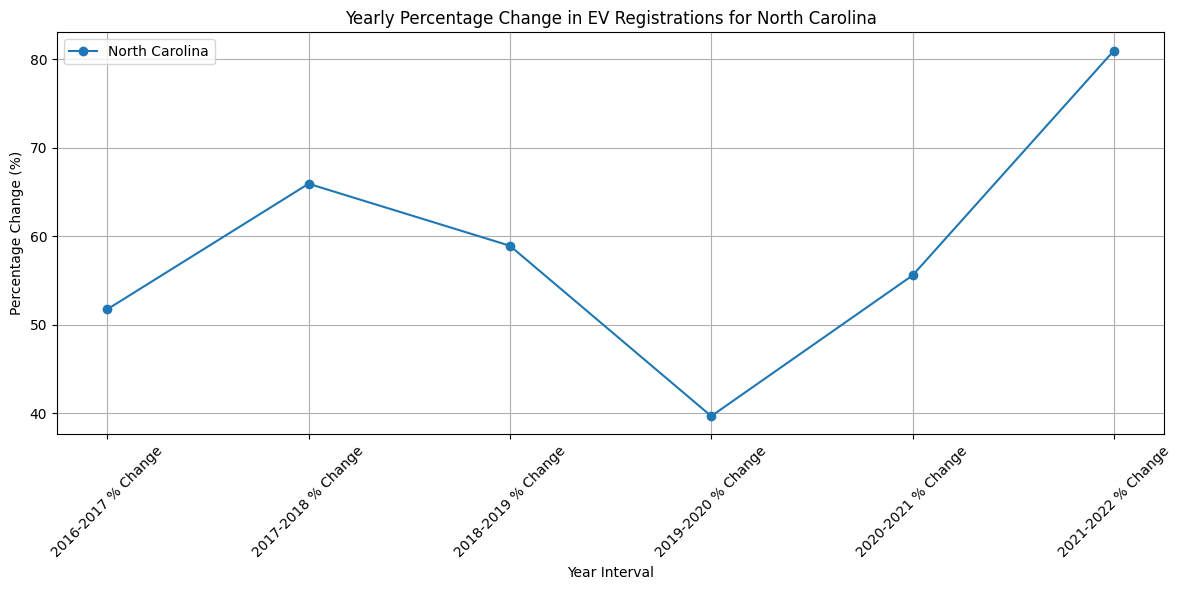

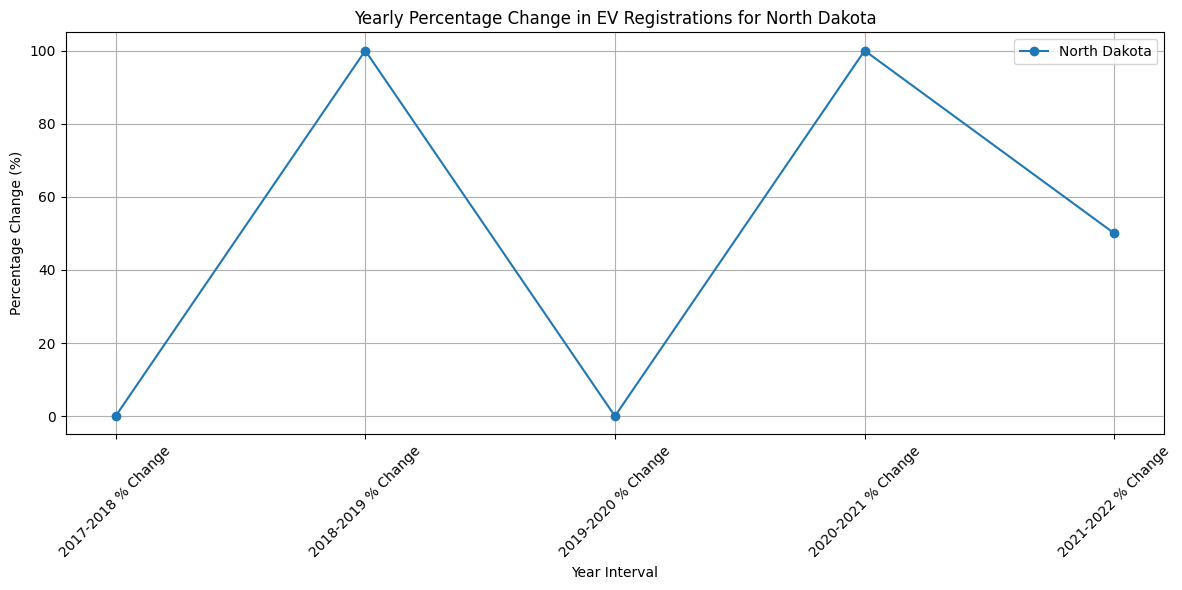

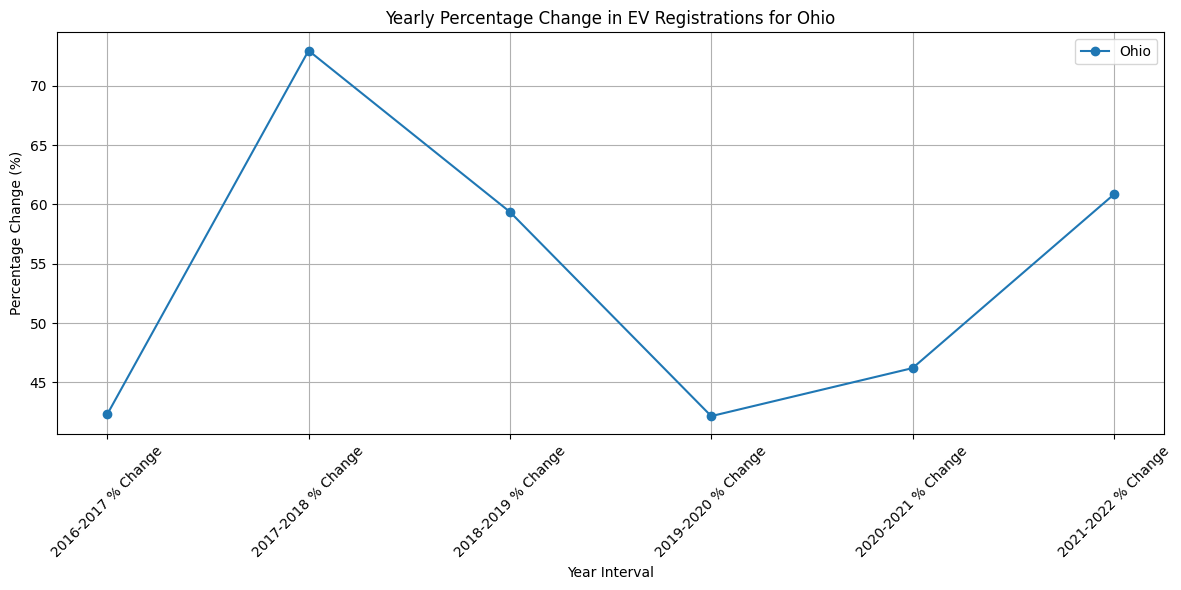

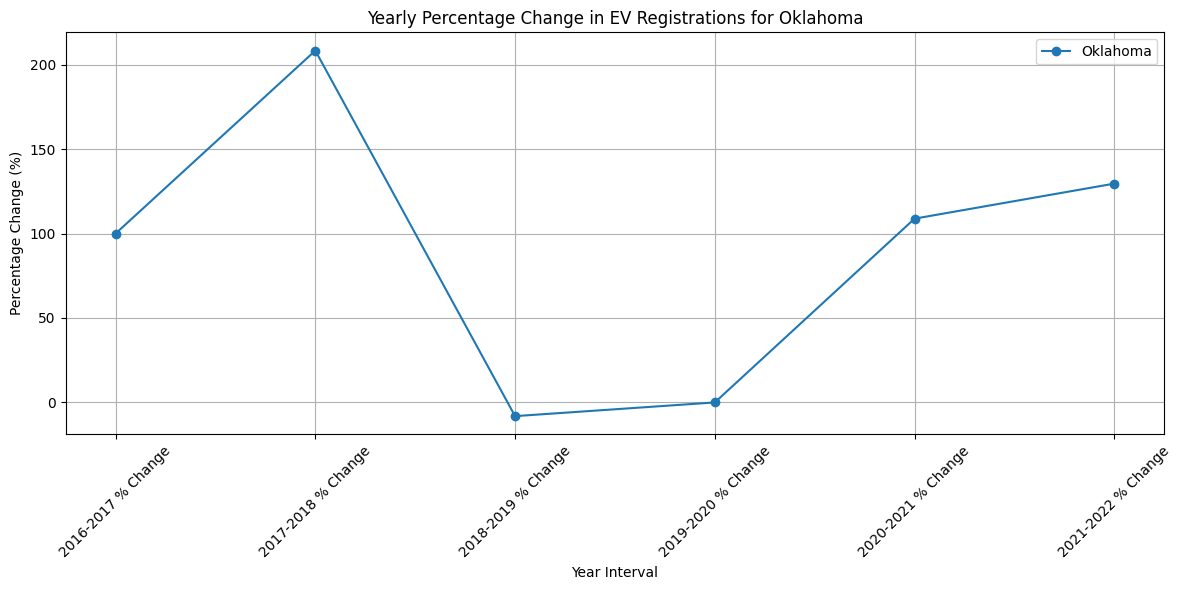

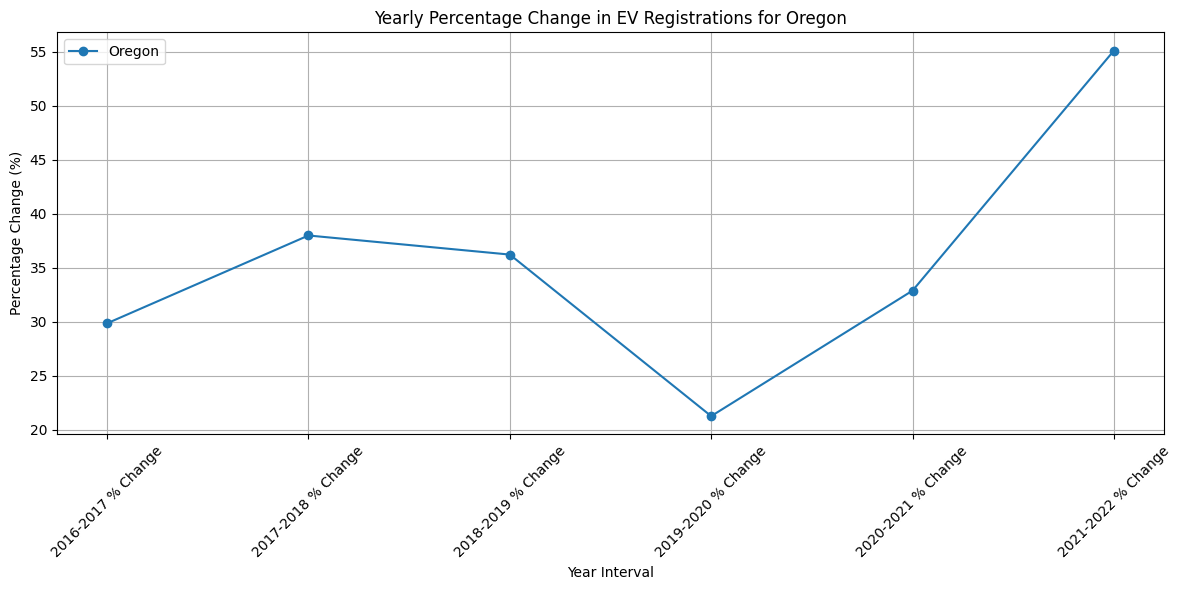

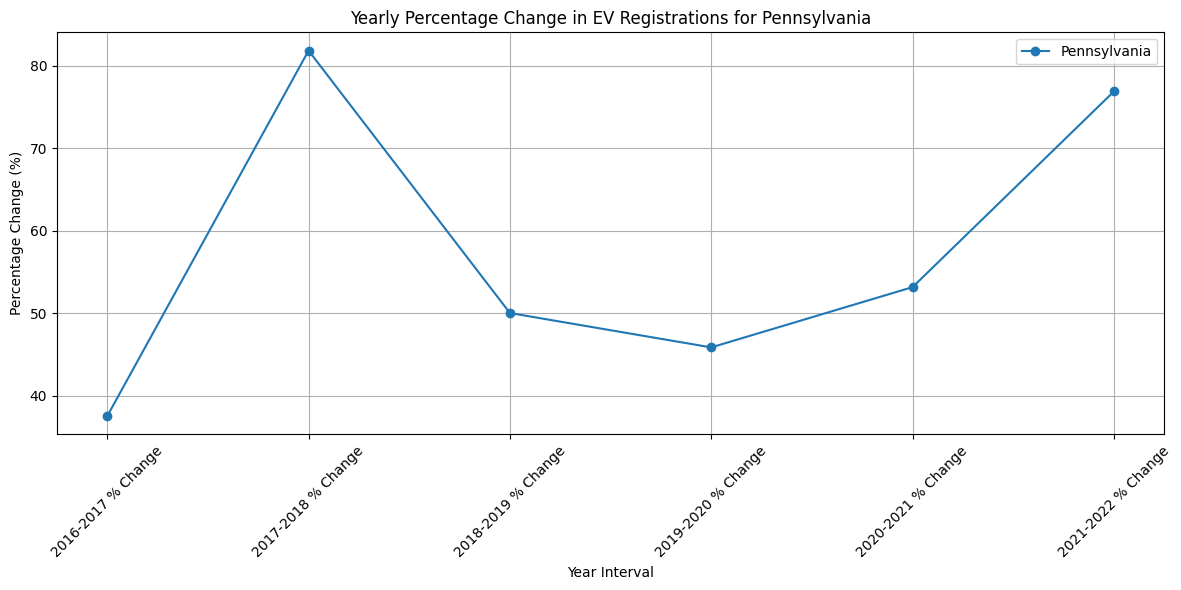

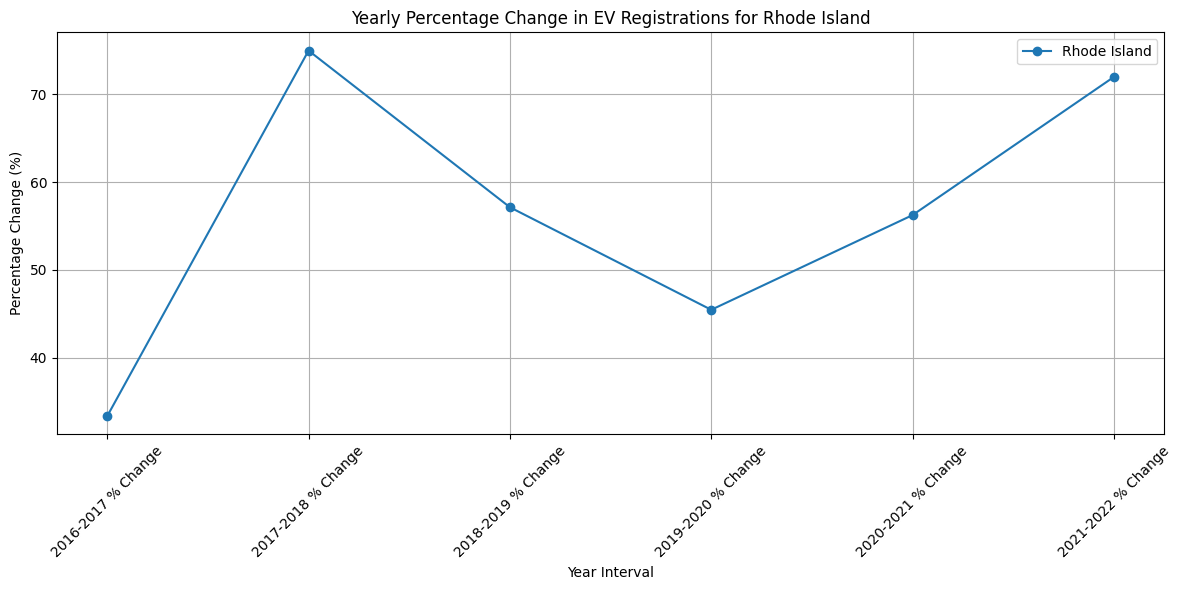

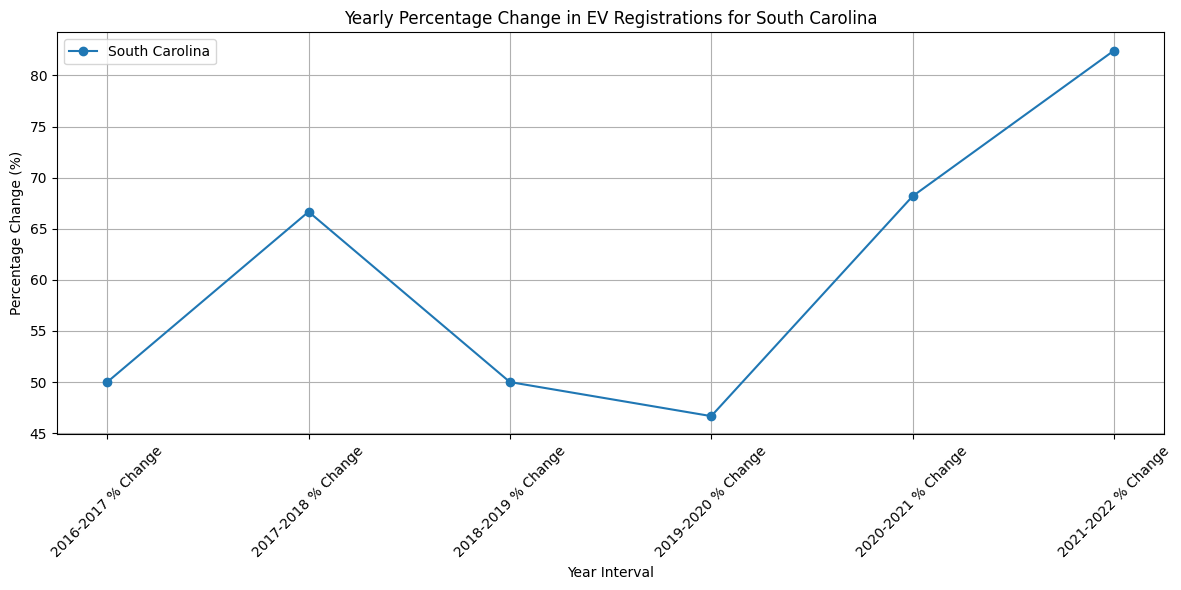

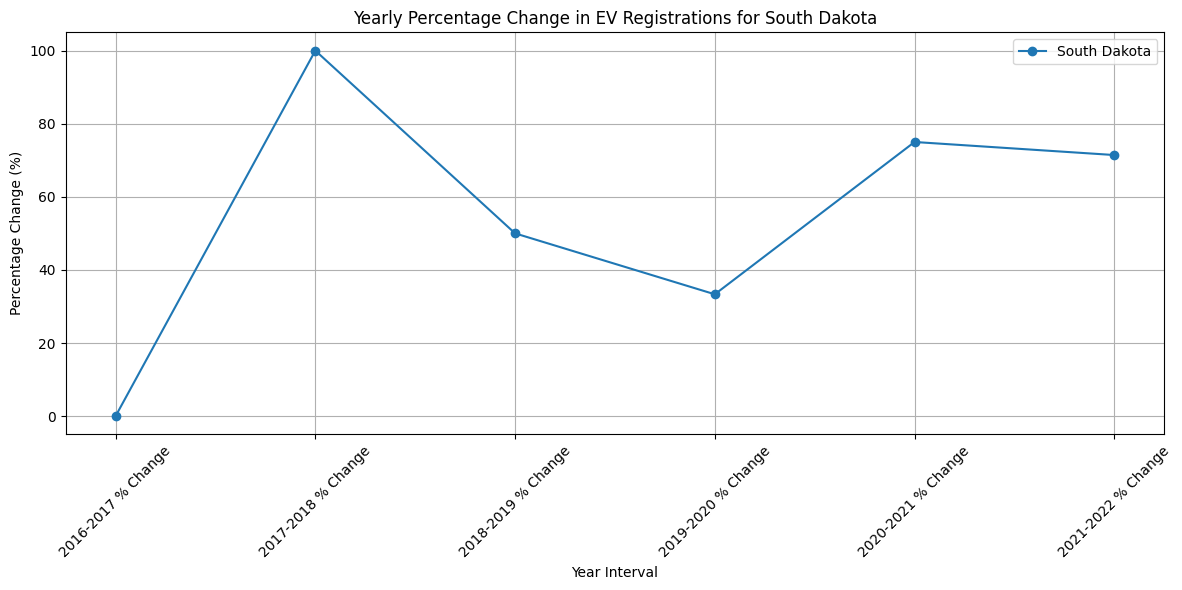

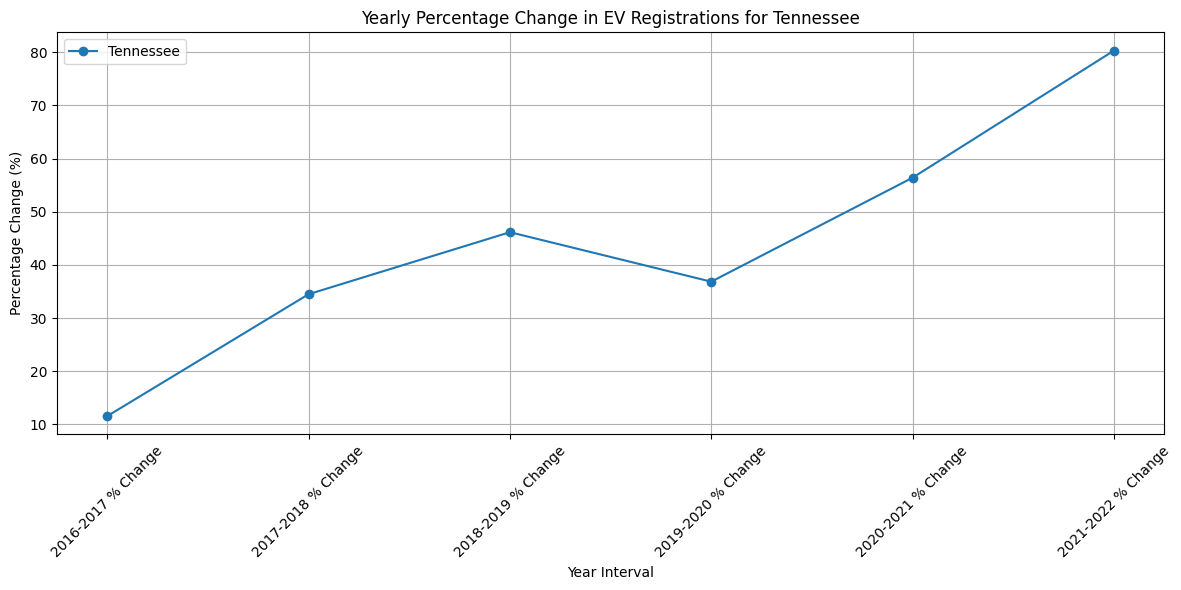

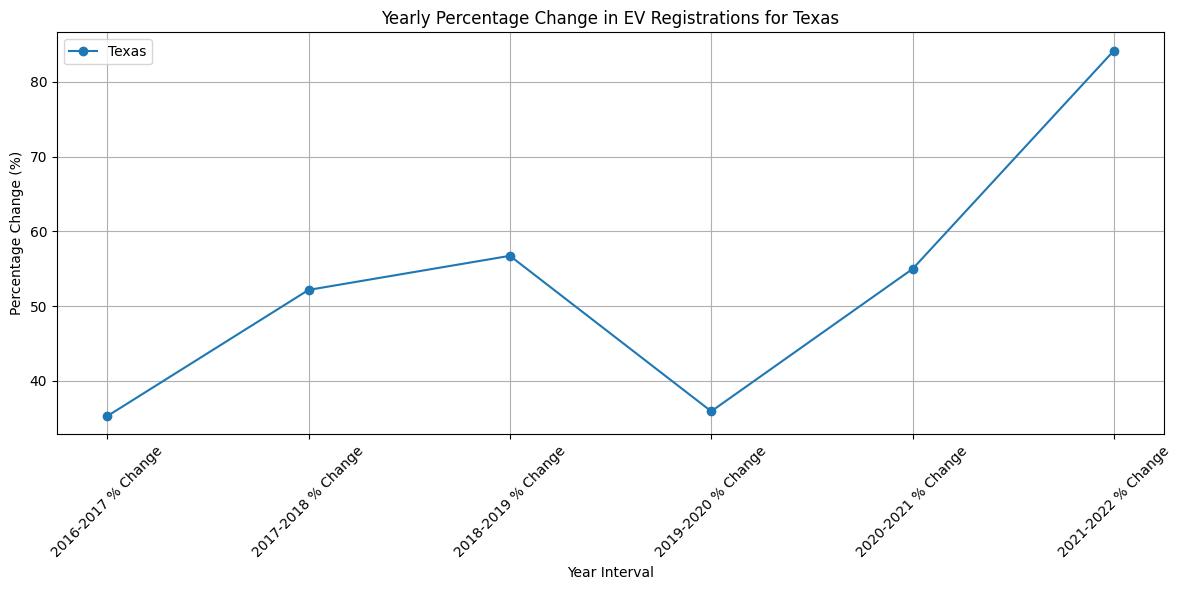

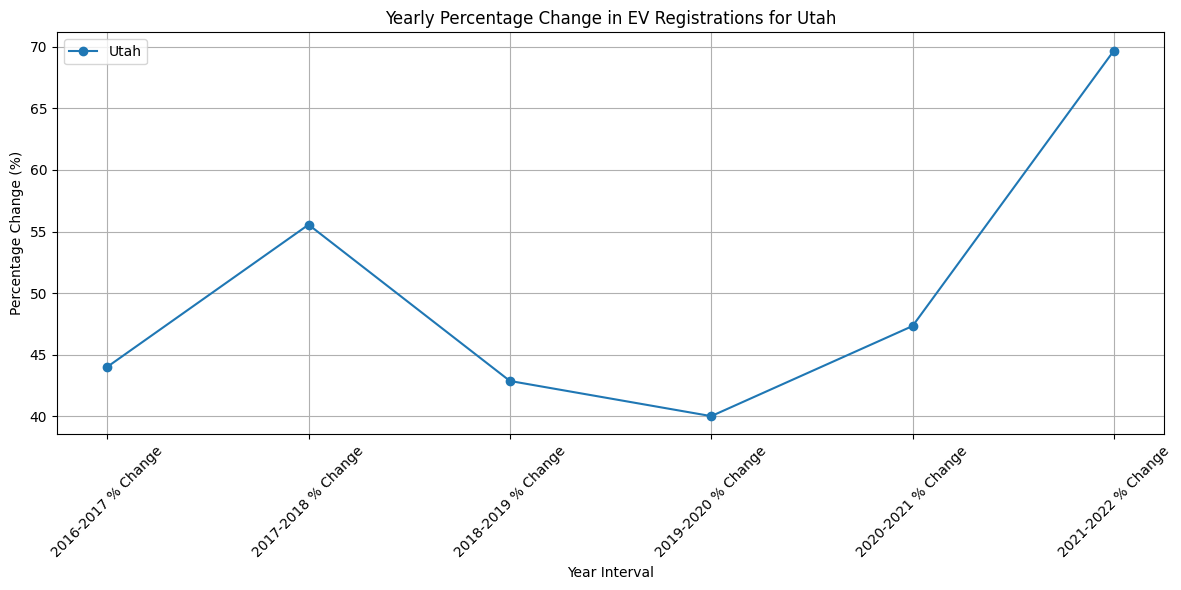

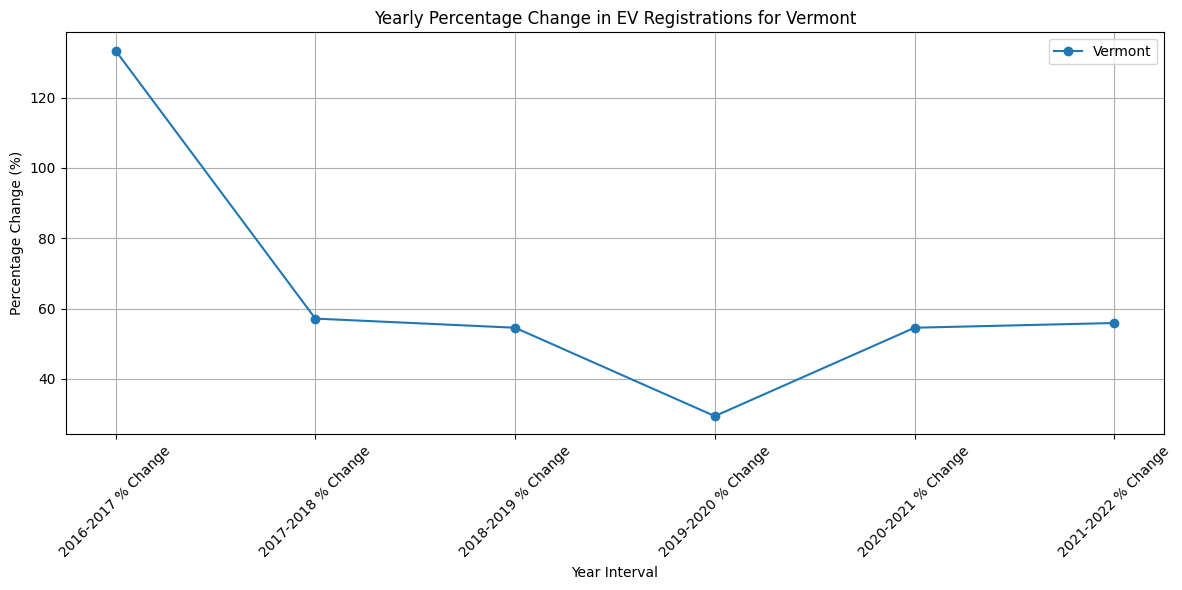

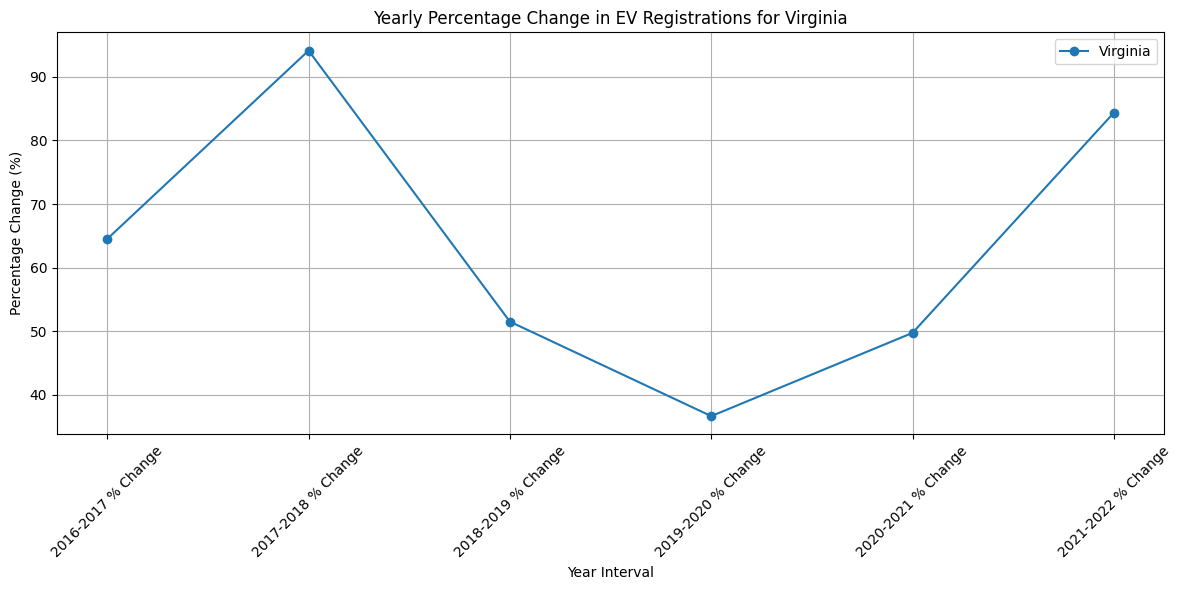

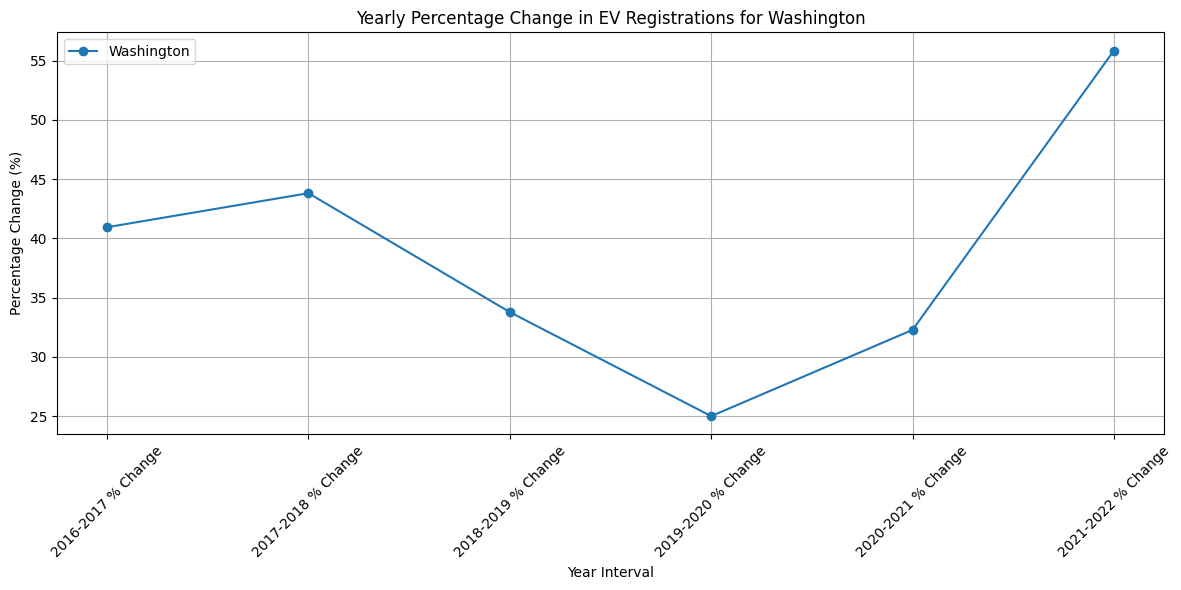

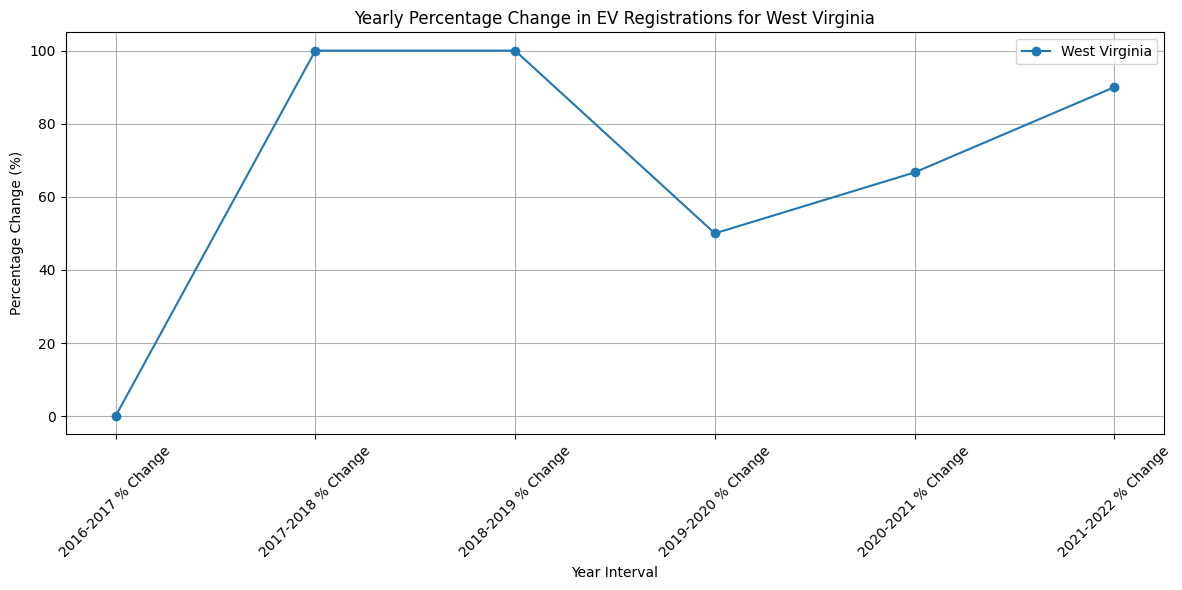

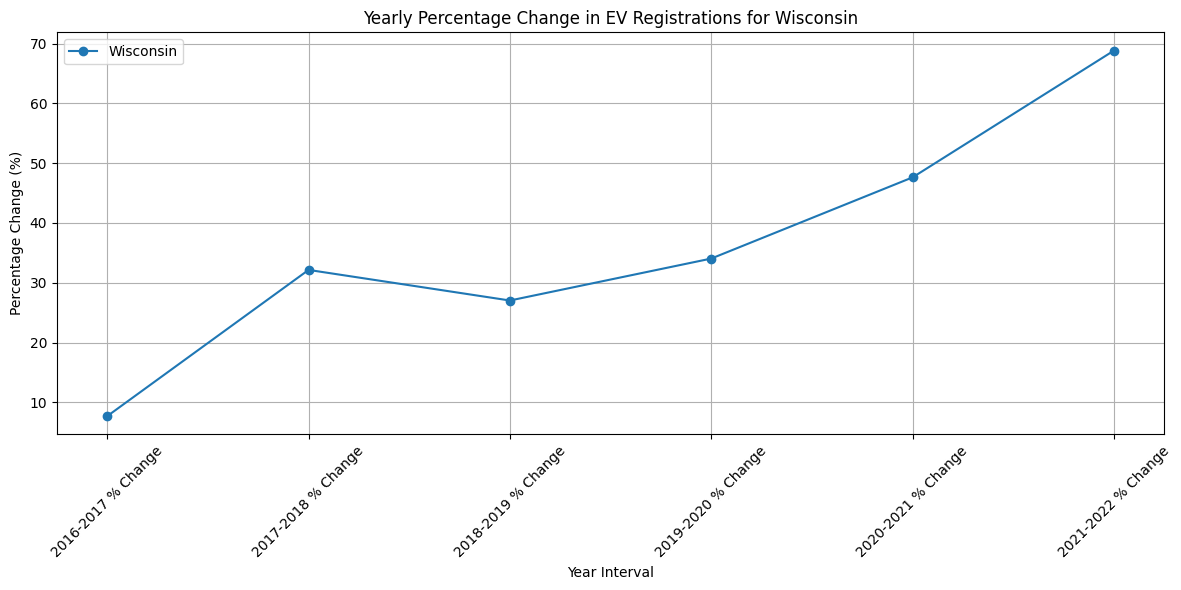

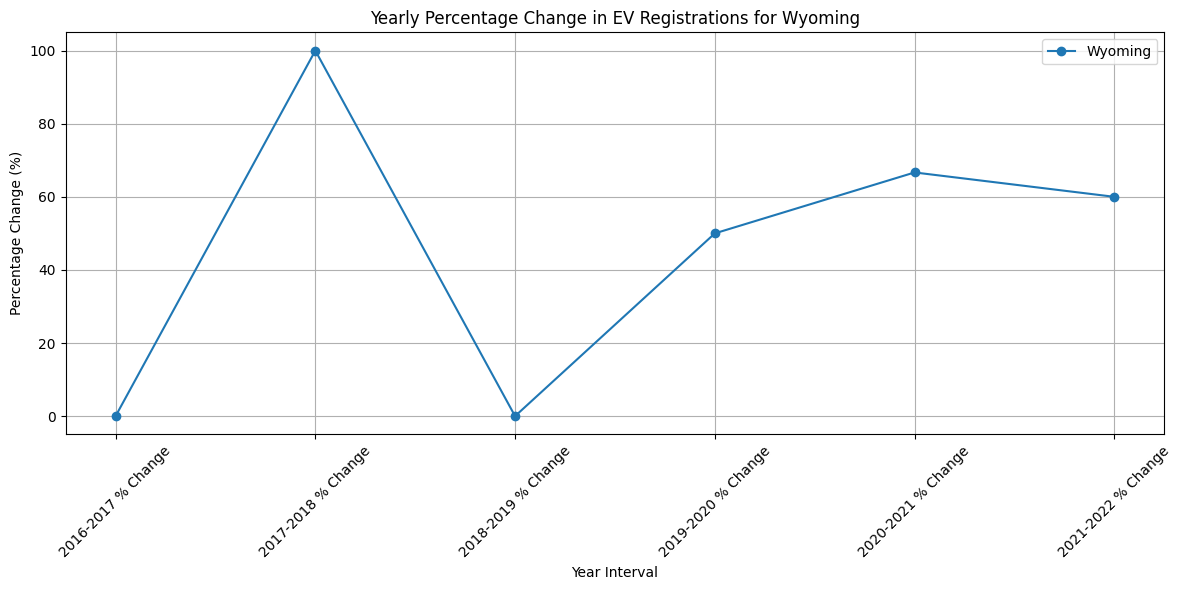

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_yearly_percentage_changes(data_pivot):
    """
    Calculates the yearly percentage changes for each state in the DataFrame.

    Args:
    data_pivot (DataFrame): A DataFrame with states as rows and years as columns.

    Returns:
    DataFrame: A DataFrame with the same states as rows and percentage changes for each year as columns.
    """
    # Ensure all data are numeric for calculations
    data_pivot = data_pivot.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Select only the columns that are years
    year_columns = [col for col in data_pivot.columns if col.isdigit()]
    data_pivot_years = data_pivot[year_columns]
    
    # Calculate the percentage change year-over-year for each state
    pct_change_df = data_pivot_years.pct_change(axis='columns').fillna(0) * 100
    
    # Remove the first column as it will have NaN values after pct_change
    pct_change_df = pct_change_df.iloc[:, 1:]
    
    # Rename columns to reflect year-over-year changes
    pct_change_df.columns = [f"{year_columns[i-1]}-{year_columns[i]} % Change" for i in range(1, len(year_columns))]
    
    return pct_change_df

def plot_state_percentage_changes(data_pivot, state):
    """
    Plots the calculated percentage change in registrations year-over-year for a specified state.

    Args:
    data_pivot (DataFrame): A DataFrame with states as rows and precomputed percentage changes as columns.
    state (str): The state to analyze and plot.

    Returns:
    None: Displays the plot.
    """
    # Calculate the yearly percentage changes
    pct_change_df = calculate_yearly_percentage_changes(data_pivot)

    # Ensure the state exists in the DataFrame
    if state not in pct_change_df.index:
        print(f"No data available for {state}. Please check the state name and try again.")
        return

    # Filter the data for the specified state
    state_pct_changes = pct_change_df.loc[state]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(state_pct_changes.index, state_pct_changes.values, marker='o')
    plt.xlabel('Year Interval')
    plt.ylabel('Percentage Change (%)')
    plt.title(f'Yearly Percentage Change in EV Registrations for {state}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_all_states_percentage_changes(data_pivot):
    """
    Plots the calculated percentage change in registrations year-over-year for all states.

    Args:
    data_pivot (DataFrame): A DataFrame with states as rows and precomputed percentage changes as columns.

    Returns:
    None: Displays the plots.
    """
    # Calculate the yearly percentage changes
    pct_change_df = calculate_yearly_percentage_changes(data_pivot)
    
    for state in pct_change_df.index:
        plt.figure(figsize=(12, 6))
        
        state_pct_changes = pct_change_df.loc[state]
        
        plt.plot(state_pct_changes.index, state_pct_changes.values, marker='o', label=state)
        plt.xlabel('Year Interval')
        plt.ylabel('Percentage Change (%)')
        plt.title(f'Yearly Percentage Change in EV Registrations for {state}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage for one state
# Assuming 'data_pivot' is the DataFrame with each column as a year and rows as states.
# plot_state_percentage_changes(data_pivot, 'California')

# Example usage for all states
# Assuming 'data_pivot' is the DataFrame with each column as a year and rows as states.
plot_all_states_percentage_changes(result)


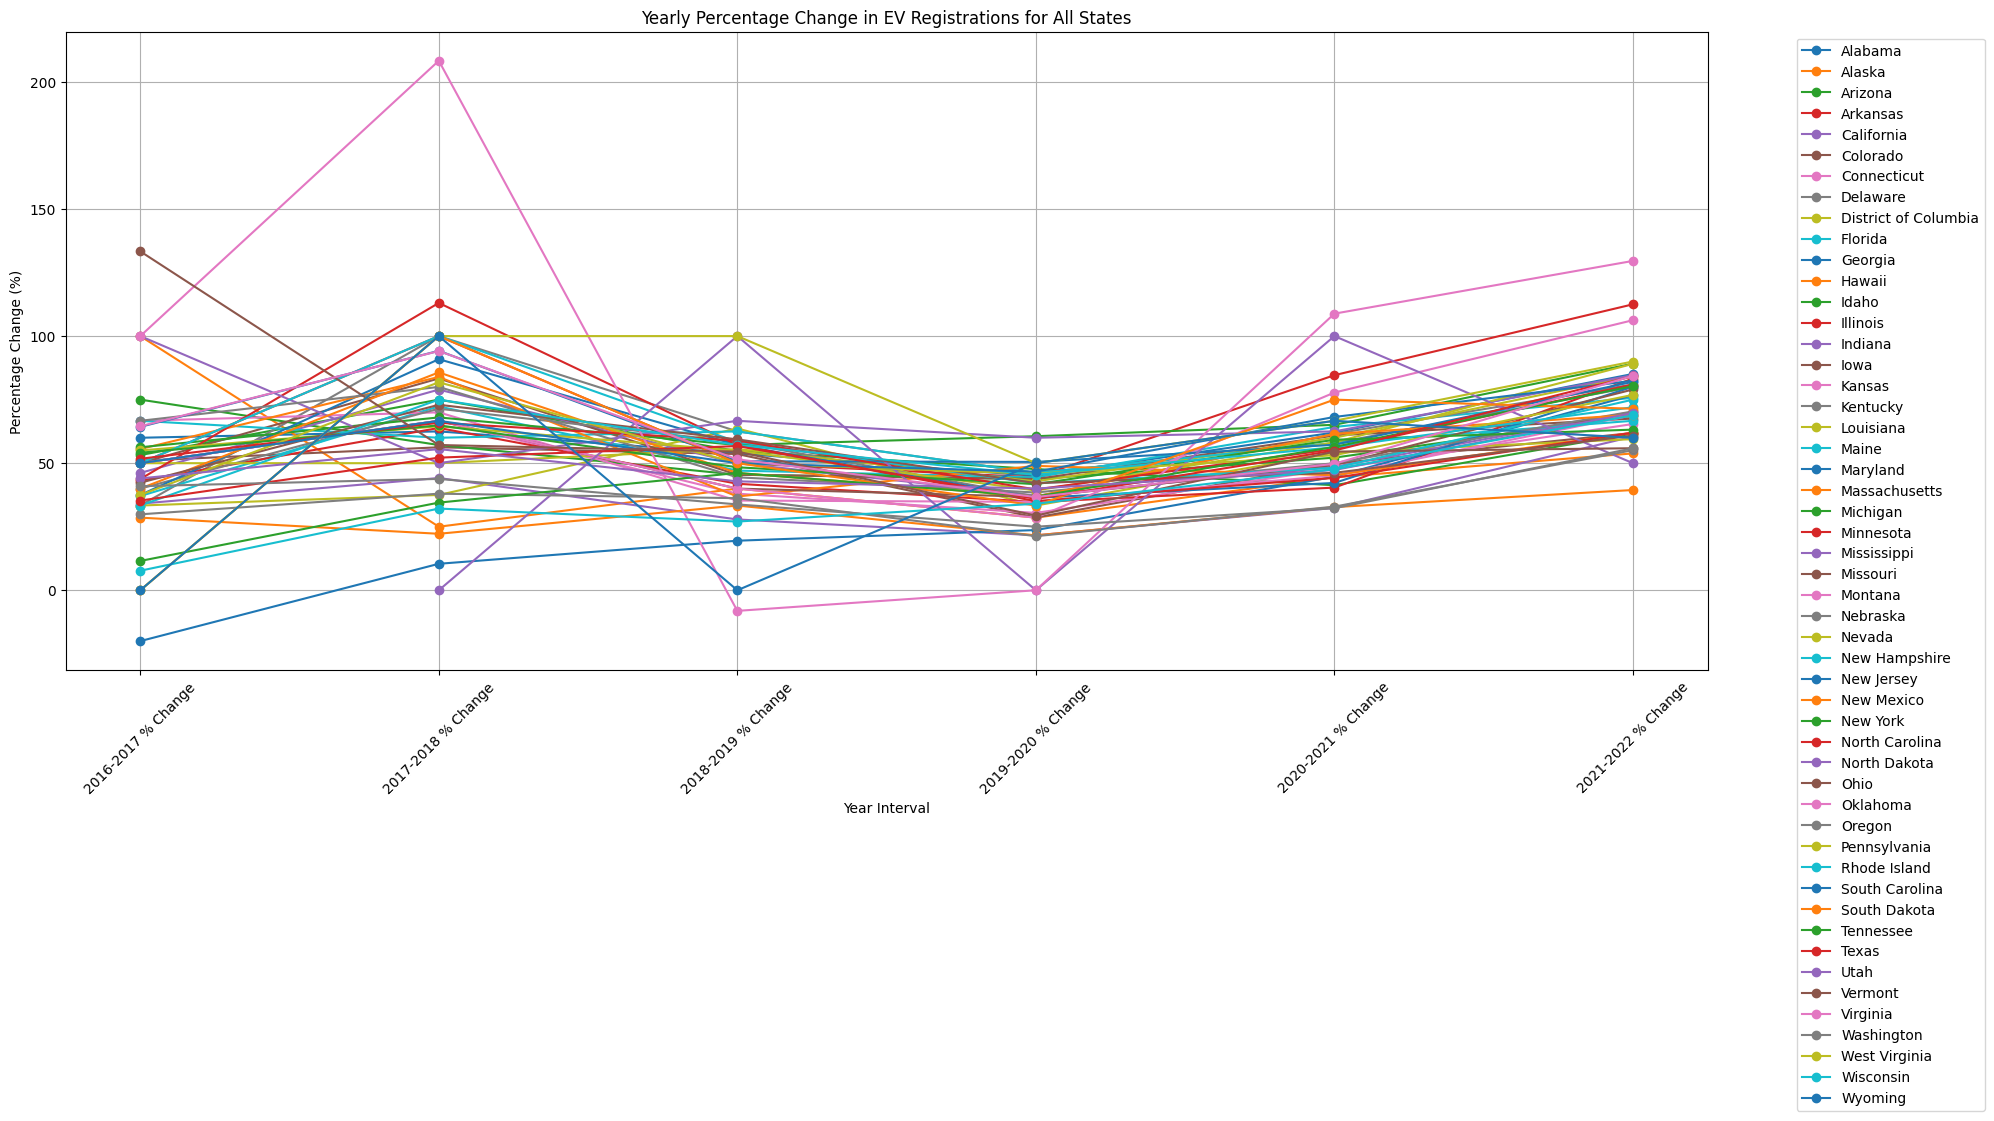

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_yearly_percentage_changes(data_pivot):
    """
    Calculates the yearly percentage changes for each state in the DataFrame.

    Args:
    data_pivot (DataFrame): A DataFrame with states as rows and years as columns.

    Returns:
    DataFrame: A DataFrame with the same states as rows and percentage changes for each year as columns.
    """
    # Ensure all data are numeric for calculations
    data_pivot = data_pivot.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Select only the columns that are years
    year_columns = [col for col in data_pivot.columns if col.isdigit()]
    data_pivot_years = data_pivot[year_columns]
    
    # Calculate the percentage change year-over-year for each state
    pct_change_df = data_pivot_years.pct_change(axis='columns').fillna(0) * 100
    
    # Remove the first column as it will have NaN values after pct_change
    pct_change_df = pct_change_df.iloc[:, 1:]
    
    # Rename columns to reflect year-over-year changes
    pct_change_df.columns = [f"{year_columns[i-1]}-{year_columns[i]} % Change" for i in range(1, len(year_columns))]
    
    return pct_change_df

def plot_all_states_percentage_changes_overlapped(data_pivot):
    """
    Plots the calculated percentage change in registrations year-over-year for all states on a single graph.

    Args:
    data_pivot (DataFrame): A DataFrame with states as rows and precomputed percentage changes as columns.

    Returns:
    None: Displays the plot.
    """
    # Calculate the yearly percentage changes
    pct_change_df = calculate_yearly_percentage_changes(data_pivot)
    
    plt.figure(figsize=(20, 10))  # Increase the figure size

    for state in pct_change_df.index:
        state_pct_changes = pct_change_df.loc[state]
        plt.plot(state_pct_changes.index, state_pct_changes.values, marker='o', label=state)

    plt.xlabel('Year Interval')
    plt.ylabel('Percentage Change (%)')
    plt.title('Yearly Percentage Change in EV Registrations for All States')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming 'data_pivot' is the DataFrame with each column as a year and rows as states.
plot_all_states_percentage_changes_overlapped(result)
